<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Ensemble Techniques and Model Tuning</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

# **Problem Statement**

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Importing necessary libraries**

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 xgboost==3.0.5 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 8.6 MB/s eta 0:00:00


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# ============================================================
# PROJECT STRUCTURE – SECTION OVERVIEW
# ============================================================

# SECTION 1: Imports & Configuration
# - Import all required libraries (NumPy, Pandas, Matplotlib, Seaborn, Sklearn, XGBoost, Imbalanced-learn)
# - Set random seeds
# - Suppress warnings
# - Define global settings

# SECTION 2: Data Loading
# - Load the EasyVisa dataset
# - Inspect basic structure (shape, columns, data types)

# SECTION 3: Exploratory Data Analysis (EDA)
# - Univariate analysis
# - Bivariate analysis
# - Visualizations to understand patterns and class imbalance
# - Initial insights from data
# Q1: What is the distribution of the target variable (case_status)?
# Q2: What are the distributions of numerical features
#     (prevailing_wage, no_of_employees, yr_of_estab)?
# Q3: How does prevailing_wage differ between Certified and Denied cases?
# Q4: How does education_of_employee impact case_status?
# Q5: How do job experience and job training relate to visa approval?
# Q6: How do categorical features (continent, region, unit_of_wage,
#     full_time_position) affect case_status?
# Q7: What overall patterns or relationships can help predict visa approval?

# SECTION 4: Data Preprocessing & Preparation for Modeling
# Section 4A: Missing Value Treatment
# - No missing values detected
# - No imputation required

# Section 4B: Feature Engineering
# - No additional feature engineering required
# - Existing features are meaningful and usable

# Section 4C: Outlier Detection and Treatment
# - No significant outliers identified
# - No treatment applied

# Section 4D: Preparing Data for Modeling
# - Dropped non-informative column: case_id
# - Performed stratified Train / Validation / Test split (60/20/20)
# - Identified numerical and categorical features
# - Applied StandardScaler to numerical features
# - Applied OneHotEncoder to categorical features
# - Preprocessing fitted ONLY on training data to prevent data leakage

# SECTION 5: Baseline Model Building – Original Data
# - Define evaluation metrics (Precision as primary)
# - Create reusable helper functions
#   • model_performance_classification_sklearn
#   • confusion_matrix_sklearn
# - Train 6 baseline models on original (imbalanced) data
# - Compare Train vs Validation performance
# - Visualize confusion matrices

# SECTION 6: Oversampled Data – SMOTE
# - Apply SMOTE ONLY on training data
# - Verify class balance before and after SMOTE
# - Train the same 6 models on SMOTE data
# - Evaluate on original validation data
# - Compare metrics and confusion matrices

# SECTION 7: Undersampled Data – RandomUnderSampler
# - Apply random undersampling ONLY on training data
# - Train the same 6 models on undersampled data
# - Evaluate on original validation data
# - Compare performance trade-offs (precision vs recall)

# SECTION 8: Pick Top 3 Models + Hyperparameter Tuning
# - Combine results from Original, SMOTE, and Undersampled models (18 total)
# - Select Top 3 models based on Validation Precision
# - Perform hyperparameter tuning using RandomizedSearchCV
# - Identify best parameter values
# - Train tuned models using best parameters
# - Save tuned models and metrics for final comparison

# SECTION 9: Final Model Selection & Test Evaluation
# - Compare the Top 3 tuned models in a clean table
# - Select the final best model based on validation metrics
# - Evaluate the final model on the TEST dataset
# - Report final Accuracy, Precision, Recall, F1-score
# - Display final confusion matrix

# SECTION 10: Business Insights & Recommendations
# - Interpret final model results
# - Explain business impact of False Positives and False Negatives
# - Provide actionable recommendations
# - Summarize key learnings and next steps
# ============================================================


In [7]:
# =========================================
# SECTION 1: Imports & Configuration
# =========================================
# - Import all required libraries (NumPy, Pandas, Matplotlib, Seaborn, Sklearn, XGBoost, Imbalanced-learn)
# - Set random seeds
# - Suppress warnings
# - Define global settings


# =========================================
# Step 1: Common imports (data handling)
# =========================================
import numpy as np
import pandas as pd


# =========================================
# Step 2: Visualization (EDA charts)
# =========================================
import seaborn as sns
import matplotlib.pyplot as plt


# =========================================
# Step 3: Train-test split (model preparation)
# =========================================
from sklearn.model_selection import train_test_split


# ===================================================
# Step 4: Preprocessing (categorical & numerical)
# - get_dummies will be used for categorical encoding
# - scaling is NOT required for tree-based models
# ===================================================
from sklearn.preprocessing import OneHotEncoder


# =================================================
# Step 5: Evaluation metrics (model performance)
# =================================================
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)


# ============================================
# Step 6: Models covered
# ============================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)


# =========================================
# Step 7: XGBoost model
# =========================================
from xgboost import XGBClassifier


# =========================================
# Step 8: Warning control (optional)
# =========================================
import warnings
warnings.filterwarnings("ignore")



# **Loading the dataset**

In [8]:
# =============================
# SECTION 2: Data Loading
# =============================
# - Load the EasyVisa dataset
# - Inspect basic structure (shape, columns, data types)


# =============================
# Step 1: Load the dataset
# =============================

# Importing Google Drive to access files stored in Drive
# This step mounts your Google Drive so that Colab can read files from it.
from google.colab import drive

# Mounting Google Drive — after running this, you will be asked to authorize.
drive.mount('/content/drive')

# Loading the CSV file into a pandas DataFrame.
# Replace the file path if your CSV is stored in a different folder.
df_original = pd.read_csv("/content/drive/MyDrive/EasyVisa.csv")

# Create a working copy of the data
# This ensures the original dataset remains untouched
df = df_original.copy()

# This gives a quick look at the actual data
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# **Overview of the Dataset**

* Observations

* Sanity checks

In [10]:
# ==========================================================
# SECTION 2: Continuation
# ==========================================================

# ==========================================================
# Step 2: Sanity Check → Is the data loaded correctly?
# ==========================================================

# Check the number of rows and columns
# Rows = number of visa applications
# Columns = number of features
df.shape


# Check column names
# This helps understand what features are available
df.columns


# Preview the first 5 rows of the dataset
# This gives a quick look at the actual data
df.head()

# ==========================================================
# Step 3: Dataset observation (basic understanding of data)
# What kind of data is this?
# ===========================================================

# Check data types and non-null counts
# Helps identify categorical vs numerical columns
# Also shows if any columns have missing values
df.info()


# Generate summary statistics for numerical columns
# Shows count, mean, std, min, max, and quartiles
df.describe()


# Check missing values column-wise
# Helps identify which columns need cleaning
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


## **Section 2: Dataset Observation**

### **Dataset Size**

1. The dataset contains **25,480 rows**, representing individual visa applications.

2. There are **12 columns**, each representing a feature related to the application.

3. This confirms that the dataset is moderately large and suitable for machine learning analysis.

### **Data Types Overview**

  The dataset contains a mix of categorical and numerical features:

  **1. Categorical (object): 9 columns:**
          Examples include: continent, education_of_employee, has_job_experience, case_status

  **2. Numerical (Integer): 2 columns:** no_of_employees, yr_of_estab,

  **3. Numerical (Float): 1 column:** prevailing_wage


### **Key Observations**

1. **Missing Values Check:** All columns have 25,480 non-null values.The missing value check shows 0 missing values across all columns.This indicates that the dataset is clean, and no missing value handling is required.

2. **Feature Types:** The dataset contains both categorical and numerical features.Since most features are categorical, encoding will be required during preprocessing.

3. **Readiness for Next Steps:** The data is ready for exploratory data analysis (EDA) and modeling.

# <a name='link2'>**Exploratory Data Analysis (EDA)**</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**

What is the distribution of visa case statuses (certified vs. denied)?


1. What is the distribution of visa case statuses (certified vs. denied)?
2. How does the education level of employees impact visa approval rates?
3. Is there a significant difference in visa approval rates between employees with and without prior job experience?
4. How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?
5. Do certain regions in the US have higher visa approval rates compared to others?
6. How does the number of employees in a company influence visa approval? Do larger companies have a higher approval rate?
7. Are visa approval rates different across various continents of employees? Which continent has the highest and lowest approval rates?

Dataset shape: (25480, 13)

Data types:


,0
case_id,object
continent,object
education_of_employee,object
has_job_experience,object
requires_job_training,object
no_of_employees,int64
yr_of_estab,int64
region_of_employment,object
prevailing_wage,float64
unit_of_wage,object



Missing values per column:


,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0



Target distribution (case_status):


,count
case_status,
Certified,17018
Denied,8462


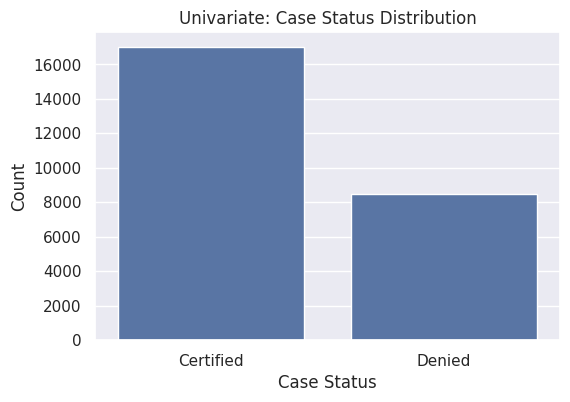

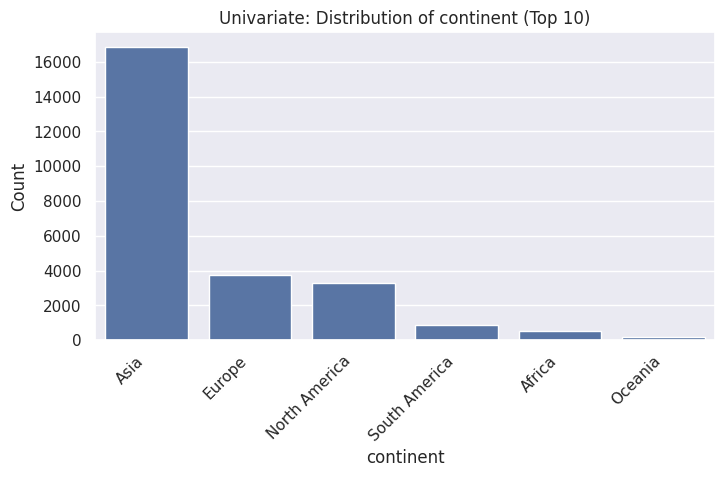

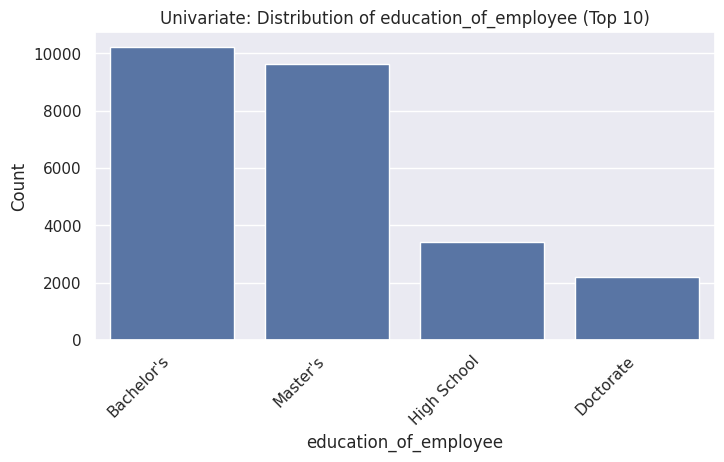

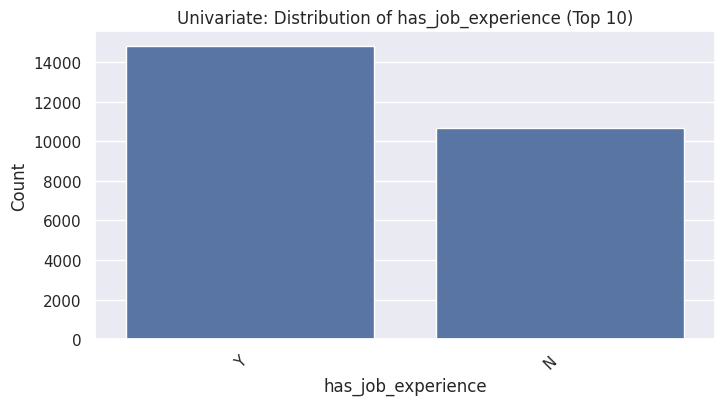

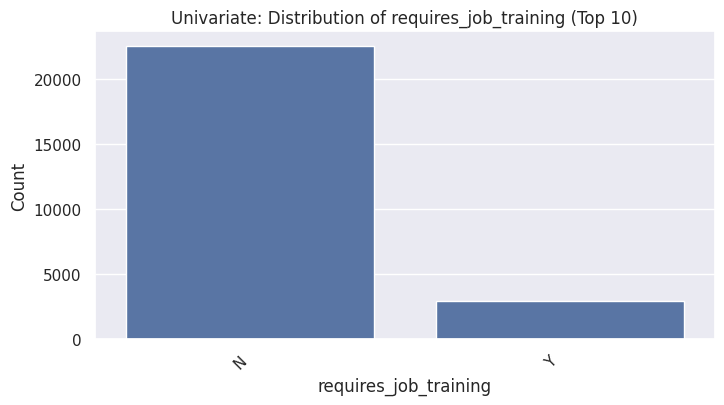

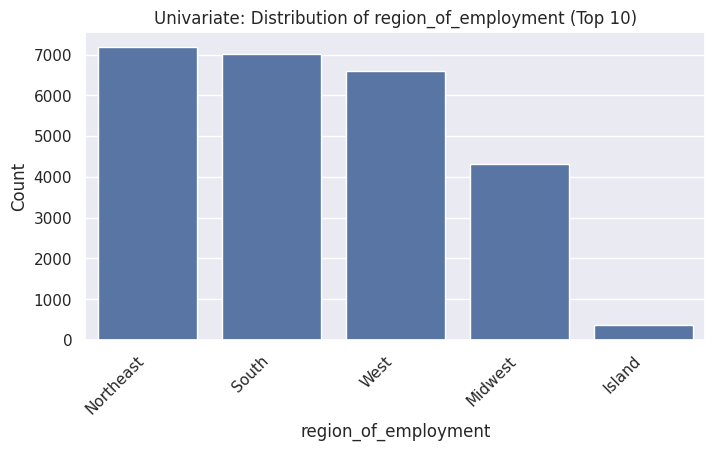

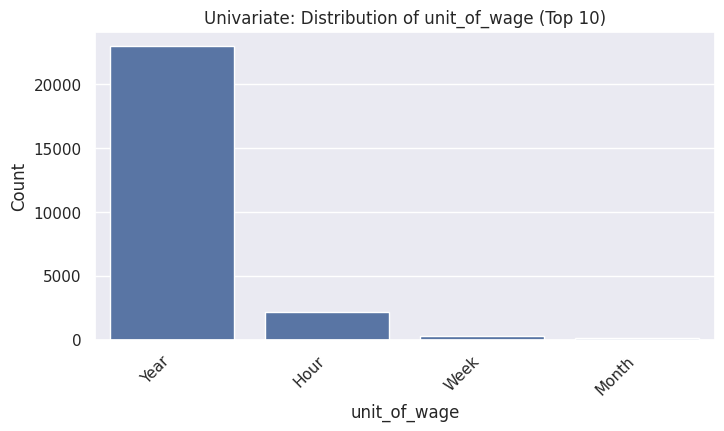

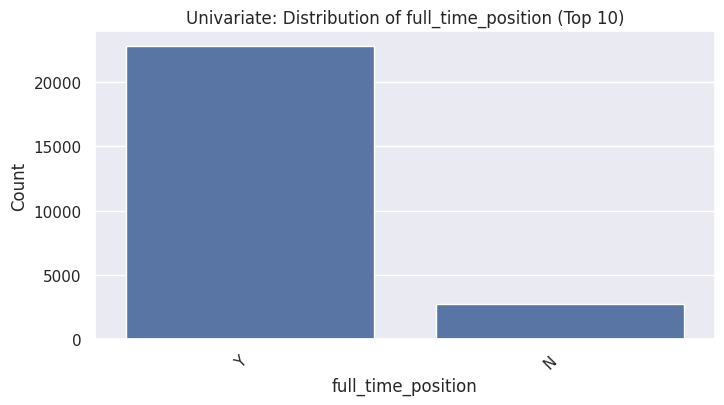

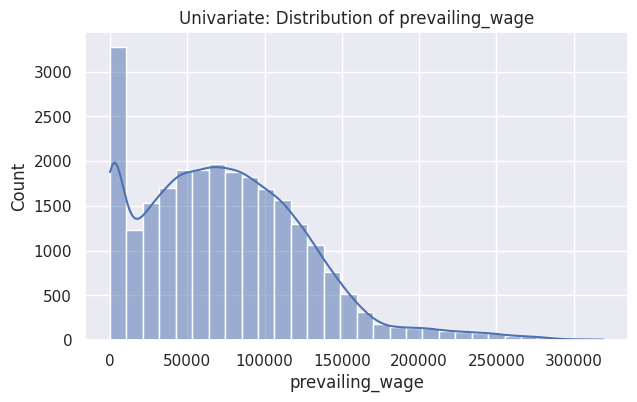

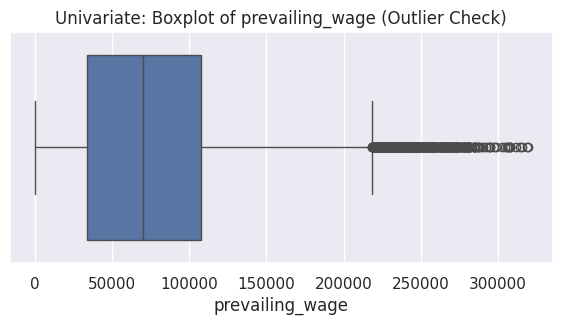

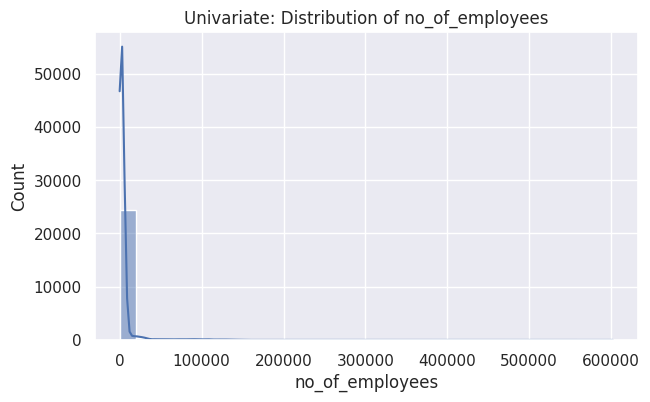

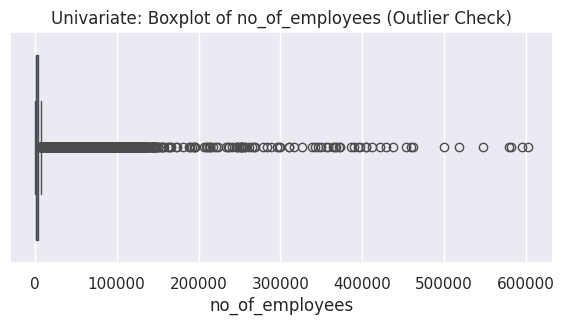

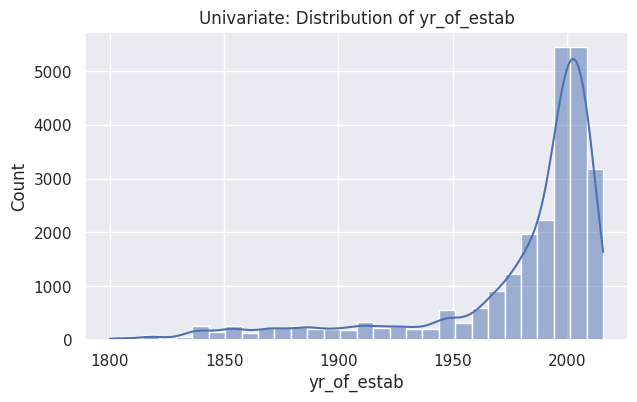

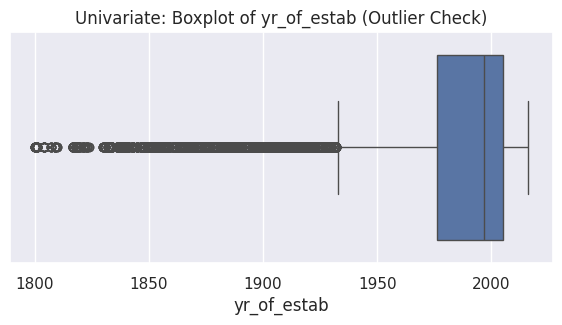

,total_count,approval_rate
education_of_employee,,
Doctorate,2192,87.23
Master's,9634,78.63
Bachelor's,10234,62.21
High School,3420,34.04


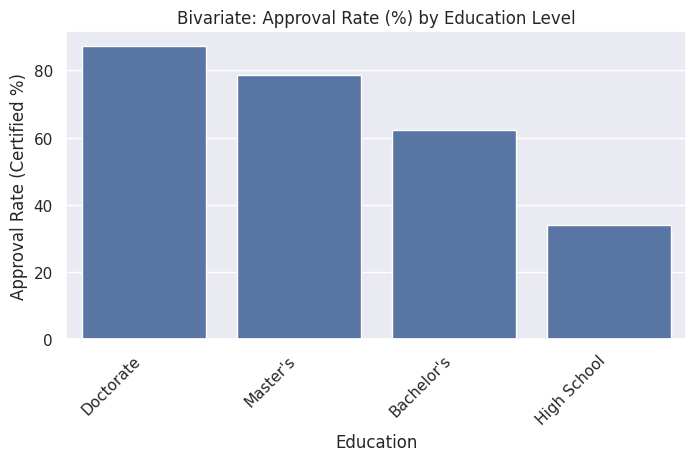

,total_count,approval_rate
has_job_experience,,
Y,14802,74.48
N,10678,56.13


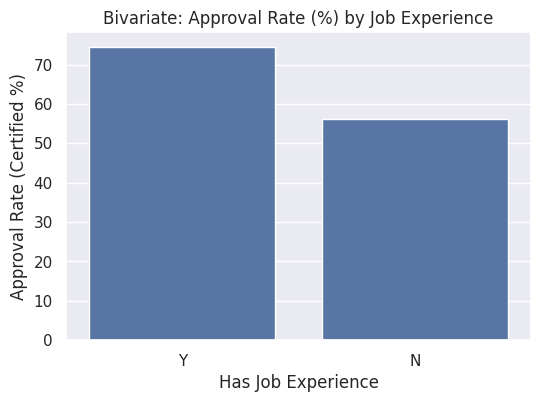

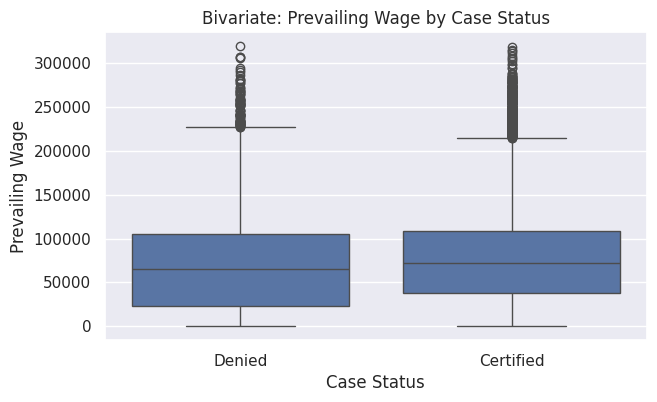

,total_count,approval_rate
region_of_employment,,
Midwest,4307,75.53
South,7017,70.02
Northeast,7195,62.90
West,6586,62.25
Island,375,60.27


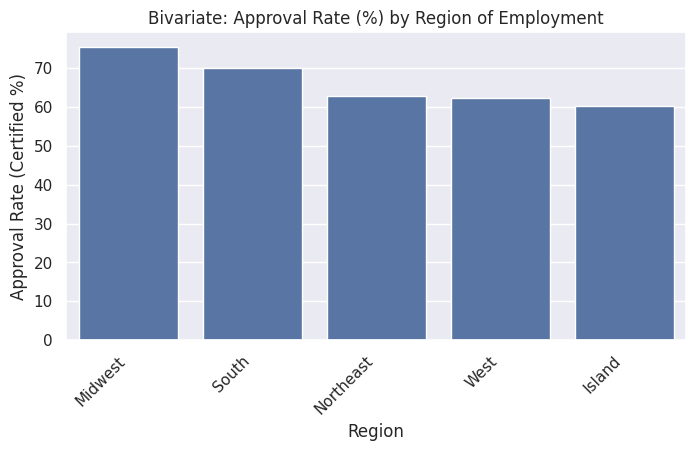

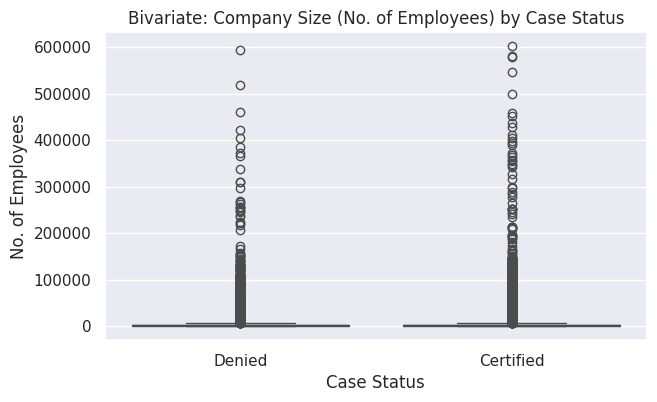

,total_count,approval_rate
continent,,
Europe,3732,79.23
Africa,551,72.05
Asia,16861,65.31
Oceania,192,63.54
North America,3292,61.88
South America,852,57.86


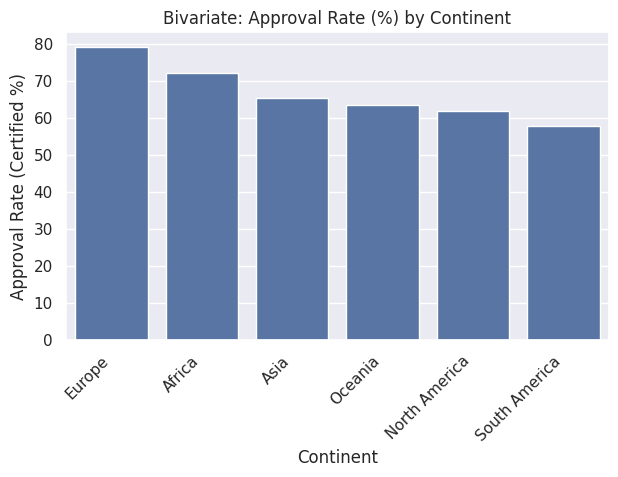

,total_count,approval_rate
full_time_position,,
N,2707,68.53
Y,22773,66.58


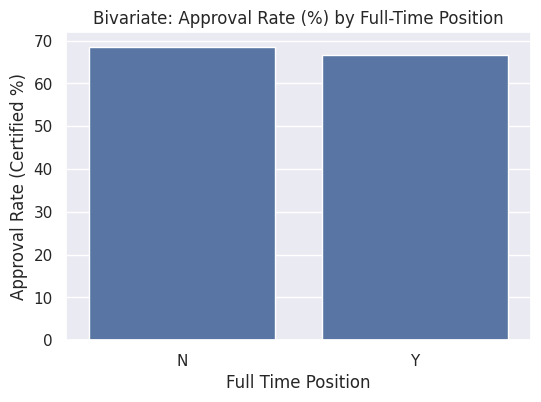

,total_count,approval_rate
requires_job_training,,
Y,2955,67.88
N,22525,66.65


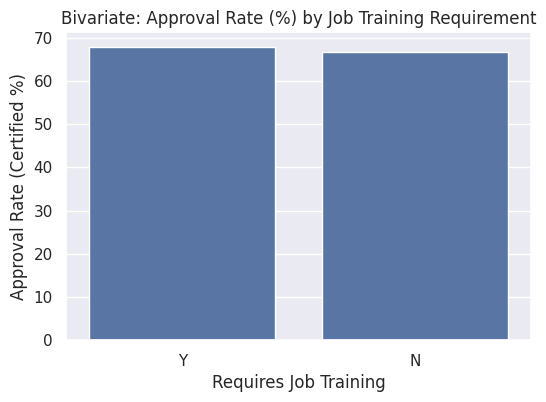

In [19]:
# ===============================================================================
# SECTION 3: EXPLORATORY DATA ANALYSIS (EDA)
# 1) Univariate analysis  (single variable)
# 2) Bivariate analysis   (relationship between variable + target)
# 3) Appropriate visualizations (countplot, histogram/boxplot, barplot, heatmap)
# 4) Meaningful observations

# Q1: What is the distribution of the target variable (case_status)?
# Q2: What are the distributions of numerical features
#     (prevailing_wage, no_of_employees, yr_of_estab)?
# Q3: How does prevailing_wage differ between Certified and Denied cases?
# Q4: How does education_of_employee impact case_status?
# Q5: How do job experience and job training relate to visa approval?
# Q6: How do categorical features (continent, region, unit_of_wage,
#     full_time_position) affect case_status?
# Q7: What overall patterns or relationships can help predict visa approval?
# ===============================================================================


# ============================================================
# Step 0: Imports (safe to re-run)
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # simple styling (optional)


# ============================================================
# Step 1: Basic Overview (required before analysis)
# ============================================================
print("Dataset shape:", df.shape)

print("\nData types:")
display(df.dtypes)

print("\nMissing values per column:")
display(df.isna().sum())

print("\nTarget distribution (case_status):")
display(df["case_status"].value_counts())


# ===============================================================================================================
# PART 1: PROBLEM DEFINITION
# ===============================================================================================================
# We are trying to predict visa approval outcome:
# - case_status: Certified / Denied
#
# EDA will help us understand:
# - class imbalance (Certified vs Denied)
# - which features are likely to influence approvals (education, experience, wage, region, company size, continent)
# - why sampling + advanced models may be needed later
# ===============================================================================================================


# ===============================================================================================================
# PART 2: UNIVARIATE ANALYSIS (Single variable)
# ===============================================================================================================

# ------------------------------------------------------------
# 2A) Target variable distribution (case_status = Certified vs Denied)
# ------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="case_status", order=df["case_status"].value_counts().index)
plt.title("Univariate: Case Status Distribution")
plt.xlabel("Case Status")
plt.ylabel("Count")
plt.show()

# -----------------------------------------------------------------
# 2B) Univariate: Categorical features distribution
# - We plot top categories only when needed to keep charts readable
# -----------------------------------------------------------------
categorical_cols = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position"
]

for col in categorical_cols:

    plt.figure(figsize=(8,4))
    # If too many categories, show top 10
    # index gives just the category names (not the counts)
    top_vals = df[col].value_counts().head(10).index
    # Create a count plot using seaborn
    sns.countplot(data=df[df[col].isin(top_vals)], x=col, order=top_vals)
    plt.title(f"Univariate: Distribution of {col} (Top 10)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.show()

# ------------------------------------------------------------
# 2C) Univariate: Numeric features distribution + outliers
# - Histogram shows distribution/skew
# - Boxplot shows potential outliers
# ------------------------------------------------------------
numeric_cols = ["prevailing_wage", "no_of_employees", "yr_of_estab"]

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Univariate: Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(7,3))
    sns.boxplot(x=df[col])
    plt.title(f"Univariate: Boxplot of {col} (Outlier Check)")
    plt.xlabel(col)
    plt.show()


# ===============================================================================================================
# PART 3: BIVARIATE ANALYSIS (Feature vs Target)
# ===============================================================================================================

# --------------------------------------------------------------------------------------------------------------
# Helper: Approval rate table
# - Converts case_status into 1/0 (Certified=1, Denied=0)
# - Then computes Certified % by category
# ---------------------------------------------------------------------------------------------------------------
# Example explanation: Assume we are grouping applications by the education level of the employee,
# such as High School, Bachelors, and Masters. Suppose High School has 3 applications with
# case_status column values as [Certified, Denied, Denied], Bachelors has 3 applications with
# [Certified, Certified, Denied], and Masters has 3 applications with [Certified, Certified, Certified].
# The code first converts "Certified" to 1 and "Denied" to 0 using astype(int), so High School becomes [1, 0, 0],
# Bachelors becomes [1, 1, 0], and Masters becomes [1, 1, 1]. The data is then grouped by education which is aka group_col
# For each education group, "total_count" is the number of applications, which is 3 for each group.
# total_count = count(case_status)
# The "approval_rate" is calculated as the average of the 1s and 0s: (sum of values) / (number of values)
# High School (1+0+0)/3 = 0.33 (33%),
# Bachelors (1+1+0)/3 = 0.67 (67%), and Masters (1+1+1)/3 = 1.00 (100%). Finally, the approval rate
# is converted to a percentage and returned as a sorted summary table.

def approval_rate_table(data, group_col):
    # Step 1: Create a copy of the input DataFrame
    # This prevents accidental changes to the original data
    tmp = data.copy()

    # Step 2: Create a new helper column called "_approved"
    #   1 → if case_status is "Certified"
    #   0 → if case_status is anything else (e.g., "Denied")
    tmp["_approved"] = (tmp["case_status"] == "Certified").astype(int)

    # Step 3: Approval rate = mean of 1/0 -> % Certified
    # groupby(specific column)
    out = tmp.groupby(group_col).agg(
        total_count=("case_status", "count"),
        approval_rate=("_approved", "mean")
    ).sort_values(by="approval_rate", ascending=False)

    # Step 4: Convert the approval_rate from a decimal to a percentage by multiplying by 100
    # (for example, 0.6667 becomes 66.67), then round the value to 2 decimal places
    out["approval_rate"] = (out["approval_rate"] * 100).round(2)
    return out


# ------------------------------------------------------------
# 3A) Education vs Case Status (approval rate by education)
# ------------------------------------------------------------
edu_rate = approval_rate_table(df, "education_of_employee")
display(edu_rate)

plt.figure(figsize=(8,4))
sns.barplot(x=edu_rate.index, y=edu_rate["approval_rate"])
plt.title("Bivariate: Approval Rate (%) by Education Level")
plt.ylabel("Approval Rate (Certified %)")
plt.xlabel("Education")
plt.xticks(rotation=45, ha="right")
plt.show()


# ------------------------------------------------------------
# 3B) Experience vs Case Status
# ------------------------------------------------------------
exp_rate = approval_rate_table(df, "has_job_experience")
display(exp_rate)

plt.figure(figsize=(6,4))
sns.barplot(x=exp_rate.index, y=exp_rate["approval_rate"])
plt.title("Bivariate: Approval Rate (%) by Job Experience")
plt.ylabel("Approval Rate (Certified %)")
plt.xlabel("Has Job Experience")
plt.show()


# ------------------------------------------------------------
# 3C) Prevailing Wage vs Case Status
# - Boxplot compares wage distribution for Certified vs Denied
# ------------------------------------------------------------
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="case_status", y="prevailing_wage")
plt.title("Bivariate: Prevailing Wage by Case Status")
plt.xlabel("Case Status")
plt.ylabel("Prevailing Wage")
plt.show()


# ------------------------------------------------------------
# 3D) Region vs Case Status (approval rate by region)
# ------------------------------------------------------------
region_rate = approval_rate_table(df, "region_of_employment")
display(region_rate)

plt.figure(figsize=(8,4))
sns.barplot(x=region_rate.index, y=region_rate["approval_rate"])
plt.title("Bivariate: Approval Rate (%) by Region of Employment")
plt.ylabel("Approval Rate (Certified %)")
plt.xlabel("Region")
plt.xticks(rotation=45, ha="right")
plt.show()


# ------------------------------------------------------------
# 3E) Company Size (no_of_employees) vs Case Status
# ------------------------------------------------------------
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="case_status", y="no_of_employees")
plt.title("Bivariate: Company Size (No. of Employees) by Case Status")
plt.xlabel("Case Status")
plt.ylabel("No. of Employees")
plt.show()


# ------------------------------------------------------------
# 3F) Continent vs Case Status (approval rate by continent)
# ------------------------------------------------------------
continent_rate = approval_rate_table(df, "continent")
display(continent_rate)

plt.figure(figsize=(7,4))
sns.barplot(x=continent_rate.index, y=continent_rate["approval_rate"])
plt.title("Bivariate: Approval Rate (%) by Continent")
plt.ylabel("Approval Rate (Certified %)")
plt.xlabel("Continent")
plt.xticks(rotation=45, ha="right")
plt.show()


# ------------------------------------------------------------
# 3G) Optional:
# Full-time position & training requirement vs approval rate
# ------------------------------------------------------------
ft_rate = approval_rate_table(df, "full_time_position")
display(ft_rate)

plt.figure(figsize=(6,4))
sns.barplot(x=ft_rate.index, y=ft_rate["approval_rate"])
plt.title("Bivariate: Approval Rate (%) by Full-Time Position")
plt.ylabel("Approval Rate (Certified %)")
plt.xlabel("Full Time Position")
plt.show()

train_rate = approval_rate_table(df, "requires_job_training")
display(train_rate)

plt.figure(figsize=(6,4))
sns.barplot(x=train_rate.index, y=train_rate["approval_rate"])
plt.title("Bivariate: Approval Rate (%) by Job Training Requirement")
plt.ylabel("Approval Rate (Certified %)")
plt.xlabel("Requires Job Training")
plt.show()


# ===============================================================================================================
# PART 4: KEY OBSERVATIONS
# ===============================================================================================================

# -------------------------------------------------
# Helpful numbers for observations
# -------------------------------------------------

# Total number of rows (applications) in the dataset
total_rows = len(df)

# Count how many times each case_status value appears
# Example: Certified = 8000, Denied = 2000
status_counts = df["case_status"].value_counts()

# Safely get the number of Certified cases
# If "Certified" does not exist, return 0 instead of throwing an error
certified_count = status_counts.get("Certified", 0)

# Safely get the number of Denied cases
# If "Denied" does not exist, return 0 instead of throwing an error
denied_count = status_counts.get("Denied", 0)

# Calculate percentage of Certified applications
# Formula: (Certified / Total rows) * 100
cert_pct = certified_count / total_rows * 100

# Calculate percentage of Denied applications
# Formula: (Denied / Total rows) * 100
den_pct = denied_count / total_rows * 100

# -------------------------------------------------
# Find the most common (top) category values
# -------------------------------------------------

# Find the continent with the highest number of applications
# idxmax() returns the category with the maximum count
top_continent = df["continent"].value_counts().idxmax()

# Find the most common region of employment
top_region = df["region_of_employment"].value_counts().idxmax()

# Find the most common education level of employees
top_edu = df["education_of_employee"].value_counts().idxmax()



## **Section 3 - EDA - Observations:**

### **Univariate Analysis: Visa Case Status Distribution**

1. The dataset is imbalanced, with more Certified cases than Denied cases.

2. This imbalance explains why accuracy alone can be misleading, and metrics like F1-score, precision, and recall are important.

3. This justifies why oversampling and undersampling techniques were later applied.

**Univariate Analysis: Requires Job Training**

1. Most visa applications do not require job training (N).

2. Only a small portion of cases require training, making this a less dominant feature.

3. This variable alone is unlikely to strongly influence approval decisions.

**Univariate Analysis: Region of Employment**

1. The highest number of applications come from the Northeast, South, and West regions.

2. The Island region has very few applications, making it statistically less reliable.

3. Regional differences may still influence approval rates and deserve further analysis.

**Univariate Analysis: Unit of Wage**

1. The majority of wages are reported on a Yearly basis.

2. Hourly, weekly, and monthly wages are rare.

3. This confirms that prevailing_wage comparisons are meaningful without major normalization issues.

**Univariate Analysis: Full-Time Position**

1. Most applications are for full-time positions (Y).

2. Part-time positions are relatively uncommon.

3. This suggests that visa sponsorship is more common for full-time roles.

**Univariate Analysis: Prevailing Wage Distribution**

1. Prevailing wages are right-skewed, with most values between $40k–$100k.

2. A small number of very high wages create long tails and outliers.

3. Outliers were not removed, as they represent valid high-paying roles.

**Univariate Analysis: Company Size (No. of Employees)**

1. Most companies are small to mid-sized, with a few very large employers.

2. The distribution is highly skewed, with many extreme outliers.

3. This suggests company size varies widely across visa sponsors.

**Univariate Analysis: Year of Establishment**

1. Most companies were established after 1950, especially post-1990.

2. Older companies exist but are less frequent.

3. This indicates visa sponsorship is common among modern organizations.



## **Section 3 - EDA - Observations:**
## **Bivariate Analysis Observations**

**Education Level vs Visa Approval Rate**

1. Approval rates increase with higher education levels.

2. Doctorate holders have the highest approval rate (~87%).

3. High School education has the lowest approval rate (~34%).

4. Education level is a strong predictor of visa approval.

**Job Experience vs Visa Approval Rate**

1. Applicants with prior job experience have a much higher approval rate (~74%).

2. Applicants without experience have a significantly lower approval rate (~56%).

3. Job experience is a critical factor in visa decisions.

**Prevailing Wage vs Case Status**

1. Certified applications generally have higher median wages.

2. Higher wages are associated with higher approval likelihood.

3. This suggests wage level plays an important role in approval outcomes.

**Region of Employment vs Approval Rate**

1. Midwest has the highest approval rate.

2. South also performs relatively well.

3. Island and West regions have slightly lower approval rates.

4. Regional economic conditions may influence approvals.

**Company Size vs Case Status**

1. Certified cases are associated with larger companies on average.

2. Larger employers may have more experience with visa sponsorship.

3. Company size shows a moderate relationship with approval.

**Continent vs Visa Approval Rate**

1. Europe has the highest approval rate.

2. Africa also shows strong approval percentages.

3. South America has the lowest approval rate.

4. Geographic origin appears to influence approval outcomes.

**Full-Time Position vs Approval Rate**

1. Approval rates for full-time and non-full-time positions are similar.

2. This suggests employment type alone does not strongly impact approval.

**Job Training Requirement vs Approval Rate**

1. Approval rates are very similar for roles with and without training.

2. Job training requirement does not significantly affect approval.

**EDA Summary**

1. Several variables such as education, job experience, prevailing wage, region, and continent show strong relationships with visa approval.

2. Variables like job training requirement and full-time status have minimal impact.

3. The dataset contains skewed numerical features, justifying robust models and sampling techniques.

Case Status Counts:
case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

Case Status Percentage Distribution:
case_status
Certified    66.79
Denied       33.21
Name: proportion, dtype: float64


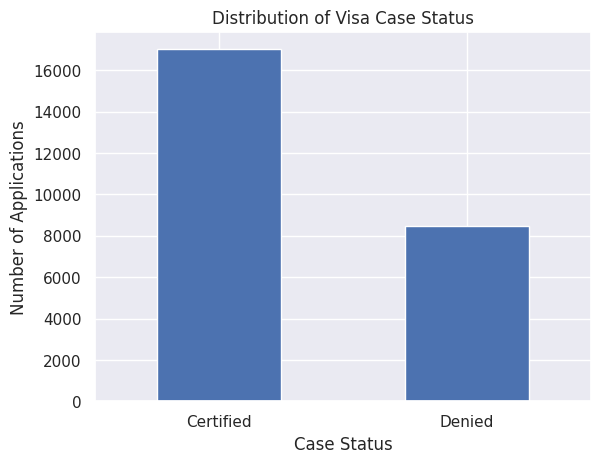

In [12]:
# ============================================================
# EDA - Question 1
# What is the distribution of visa case statuses (Certified vs Denied)?
# ============================================================

# Step 1: Count how many applications are in each case_status category
# value_counts() gives the frequency of each label (Certified/Denied)
case_status_counts = df["case_status"].value_counts()

# Step 2: Print the counts (raw numbers)
print("Case Status Counts:")
print(case_status_counts)


# Step 3: Calculate percentage distribution (easier to interpret)
# normalize=True converts counts to proportions, then we multiply by 100
case_status_percent = df["case_status"].value_counts(normalize=True) * 100

# Step 4: Print the percentages (rounded for readability)
print("\nCase Status Percentage Distribution:")
print(case_status_percent.round(2))


# Step 5: Visualize the distribution using a bar chart
# Bar chart helps quickly compare Certified vs Denied
case_status_counts.plot(kind="bar")

# Step 6: Add chart labels and title for clarity
plt.title("Distribution of Visa Case Status")
plt.xlabel("Case Status")
plt.ylabel("Number of Applications")
plt.xticks(rotation=0)

# Step 7: Display the plot
plt.show()


## **EDA Observation – Question 1:**
### **Distribution of Visa Case Status**

1. The dataset shows that **17,018 visa applications (66.79%)** were **Certified**, while **8,462 applications (33.21%)** were **Denied**.

2. This indicates that approximately **two-thirds** of the visa applications are **approved**, while about **one-third are denied**.

3. The distribution is **moderately imbalanced**, with the Certified class being the majority class.

4. This imbalance should be considered during model evaluation, as accuracy alone may be misleading and additional metrics such as precision, recall, and F1-score will be important.

Education Level vs Case Status (Counts):
----------------------------------------:
case_status            Certified  Denied
education_of_employee                   
Bachelor's                  6367    3867
Doctorate                   1912     280
High School                 1164    2256
Master's                    7575    2059

Education Level vs Approval Rate (%):
----------------------------------------:
case_status            Certified  Denied  Total  Approval_Rate_%
education_of_employee                                           
Doctorate                   1912     280   2192            87.23
Master's                    7575    2059   9634            78.63
Bachelor's                  6367    3867  10234            62.21
High School                 1164    2256   3420            34.04


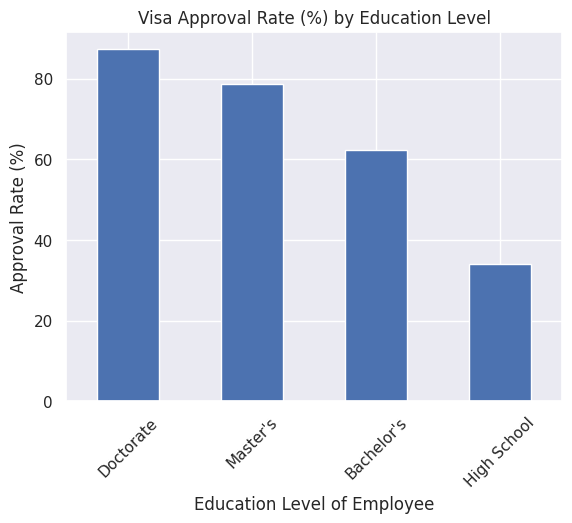

In [13]:
# ===============================================================================================================
# EDA - Question 2
# How does the education level of employees impact visa approval rates?
# ===============================================================================================================
# Explanation 1: edu_status_counts = pd.crosstab(df["education_of_employee"], df["case_status"])
# pd.crosstab() takes one column to form the rows (education_of_employee) and another
# column to form the columns (case_status), then counts how many times each combination
# appears. Since case_status contains unique values like "Certified" and "Denied",
# pd.crosstab() automatically converts those values into separate column names.
# Each of these columns ("Certified" and "Denied") contains the count of applications
# for that education level with that specific case status.
# Example: edu_status_counts["Certified"] and edu_status_counts["Denied"]

# Explanation 2: count is misleading vs approval rate tells a different story.
# I used a cross-tab to analyze how visa approval outcomes vary by education level because
# raw Certified counts alone can be misleading. For example, suppose Bachelors has 500
# Certified cases out of 700 total applications, while Masters has 300 Certified cases out
# of 350 total applications. Looking only at counts (500 vs 300) might suggest Bachelors
# performs better, but the approval rates tell a different story: Bachelors approval rate
# is 500 / (500 + 200) = 500 / 700 = 71.4%, while Masters approval rate is
# 300 / (300 + 50) = 300 / 350 = 85.7%. A cross-tab shows both Certified and Denied counts
# for each education group, allowing us to calculate approval rates correctly by dividing
# Certified cases by total applications. Converting these values to percentages makes it
# easy to fairly compare which education levels have higher or lower visa approval chances.


# Step 1: Create a cross-tab (count table) of education level vs case status
# This shows how many Certified/Denied applications exist for each education level
edu_status_counts = pd.crosstab(df["education_of_employee"], df["case_status"])

# Step 2: Display the count table
print("Education Level vs Case Status (Counts):")
print("----------------------------------------:")
print(edu_status_counts)


# Step 3: Calculate approval rate (%) for each education level
# Approval rate = Certified / (Certified + Denied) * 100
edu_status_rates = edu_status_counts.copy()
edu_status_rates["Total"] = edu_status_rates.sum(axis=1)
edu_status_rates["Approval_Rate_%"] = (edu_status_rates["Certified"] / edu_status_rates["Total"]) * 100

# Step 4: Show approval rates sorted from highest to lowest
edu_rates_sorted = edu_status_rates[["Certified", "Denied", "Total", "Approval_Rate_%"]].sort_values(
    by="Approval_Rate_%", ascending=False
)

print("\nEducation Level vs Approval Rate (%):")
print("----------------------------------------:")
print(edu_rates_sorted.round(2))


# Step 5: Visualize approval rate by education level (bar chart)
# This makes it easy to compare which education levels have higher/lower approval rates
edu_rates_sorted["Approval_Rate_%"].plot(kind="bar")

# Step 6: Add chart title and axis labels
plt.title("Visa Approval Rate (%) by Education Level")
plt.xlabel("Education Level of Employee")
plt.ylabel("Approval Rate (%)")
plt.xticks(rotation=45)

# Step 7: Display the plot
plt.show()



## **EDA Observation - Question 2**
### **How does the education level of employees impact visa approval rates?**


1. The table **Education Level vs Case Status (Counts)** shows how many applications were **Certified** and **Denied** for each education category.

2. The **Approval_Rate_%** column shows the approval percentage for each education level using: **Approval Rate (%) = Certified / (Certified + Denied) × 100**

3. From the sorted results and bar chart:
    - The education level with the **highest approval rate** is: **Doctorate (87.23%)**
    - The education level with the **lowest approval rate** is: **High School (34.04%)**
    - Overall, this indicates that **education level does influence visa approval rates**, as there is a clear difference in approval percentages across education categories.

4. The approval rates vary significantly across education levels, with higher education levels showing much higher approval rates.

5. This suggests that education level is a strong factor influencing visa approval outcomes in this dataset.


Job Experience vs Case Status (Counts):
----------------------------------------:
case_status         Certified  Denied
has_job_experience                   
N                        5994    4684
Y                       11024    3778

Job Experience vs Approval Rate (%):
----------------------------------------:
case_status         Certified  Denied  Total  Approval_Rate_%
has_job_experience                                           
N                        5994    4684  10678            56.13
Y                       11024    3778  14802            74.48


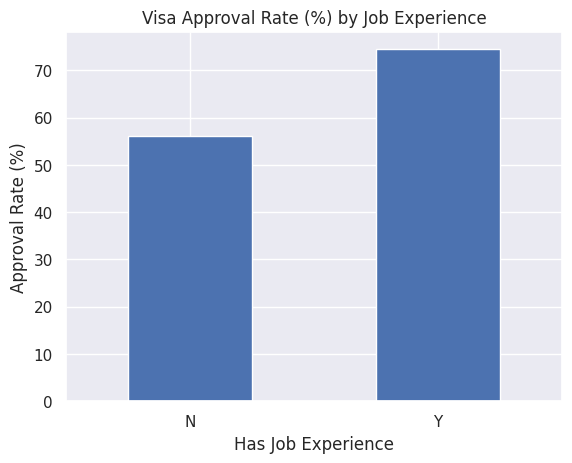

In [14]:
# ============================================================
# EDA - Question 3
# Is there a significant difference in visa approval rates between
# employees with and without prior job experience?
# ============================================================

# Step 1: Create a cross-tab (count table) of job experience vs case status
# This shows how many Certified/Denied applications exist for each group
experience_status_counts = pd.crosstab(
    df["has_job_experience"],
    df["case_status"]
)

# Step 2: Display the count table
print("Job Experience vs Case Status (Counts):")
print("----------------------------------------:")
print(experience_status_counts)


# Step 3: Calculate approval rate (%) for each job experience group
# Approval rate = Certified / (Certified + Denied) * 100
experience_rates = experience_status_counts.copy()
experience_rates["Total"] = experience_rates.sum(axis=1)
experience_rates["Approval_Rate_%"] = (
    experience_rates["Certified"] / experience_rates["Total"]
) * 100

# Step 4: Display approval rates
print("\nJob Experience vs Approval Rate (%):")
print("----------------------------------------:")
print(experience_rates.round(2))


# Step 5: Visualize approval rate by job experience
experience_rates["Approval_Rate_%"].plot(kind="bar")

# Step 6: Add chart labels and title
plt.title("Visa Approval Rate (%) by Job Experience")
plt.xlabel("Has Job Experience")
plt.ylabel("Approval Rate (%)")
plt.xticks(rotation=0)

# Step 7: Display the plot
plt.show()


## **EDA Observation – Question 3**
### **Is there a significant difference in visa approval rates between employees with and without prior job experience?**

1. The table **Job Experience vs Case Status (Counts)** shows the number of Certified and Denied visa applications for employees **with** and **without** prior job experience.

2. The **Approval_Rate_%** column represents the percentage of approved applications for each group, calculated as:
**Approval Rate (%) = Certified / (Certified + Denied) × 100**

3. From the results:

    - Employees **with prior job experience (Y)** have an approval rate of **74.48%**.

    - Employees **without prior job experience (N)** have an approval rate of **56.13%**.

4. There is a **clear and significant difference** in approval rates between the two groups, with experienced employees having a much higher approval rate.

5. This suggests that **prior job experience is an important factor** influencing visa approval outcomes in this dataset.

Prevailing Wage Summary by Case Status:
----------------------------------------:
               count          mean           std     min        25%       50%  \
case_status                                                                     
Certified    17018.0  77293.619243  52042.715576  2.1367  38375.330  72486.27   
Denied        8462.0  68748.681580  53890.166031  2.9561  23497.295  65431.46   

                     75%        max  
case_status                          
Certified    108879.1075  318446.05  
Denied       105097.6400  319210.27  


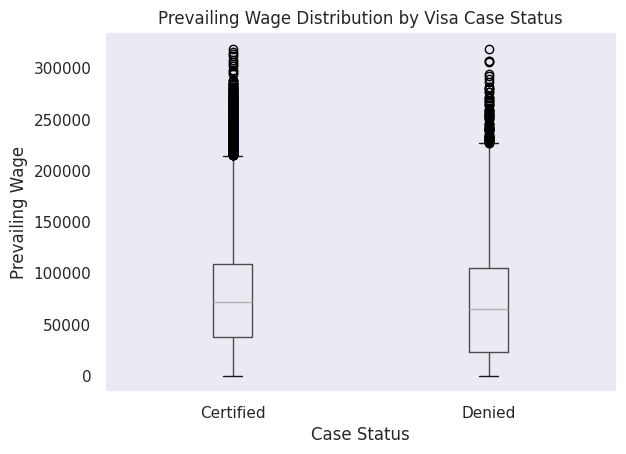

In [15]:
# ============================================================
# EDA - Question 4
# How does the prevailing wage affect visa approval?
# Do higher wages lead to higher chances of approval?
# ============================================================

# Step 1: Group the data by case status and calculate
# summary statistics for prevailing wage
# This helps compare wages for Certified vs Denied cases
wage_summary = df.groupby("case_status")["prevailing_wage"].describe()

# Step 2: Display the summary statistics
print("Prevailing Wage Summary by Case Status:")
print("----------------------------------------:")
print(wage_summary)


# Step 3: Visualize wage distribution by case status using boxplots
# Boxplots help compare median, spread, and outliers
df.boxplot(
    column="prevailing_wage",
    by="case_status",
    grid=False
)

# Step 4: Add plot title and labels
plt.title("Prevailing Wage Distribution by Visa Case Status")
plt.suptitle("")  # removes automatic pandas subtitle
plt.xlabel("Case Status")
plt.ylabel("Prevailing Wage")

# Step 5: Display the plot
plt.show()


## **EDA Observation – Question 4**
### **How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?**

1. The summary statistics compare the **prevailing wage distribution** for **Certified** and **Denied** visa applications.

2. Key observations from the statistics:

    - The **mean prevailing wage** for **Certified** applications is **$77,293.62**.

    - The **mean prevailing wage** for **Denied** applications is **$68,748.68**.

    - The **median (50%) prevailing wage** for Certified cases is **$72,486.27**, which is higher than the median wage for Denied cases **($65,431.46)**.

3. Across all quartiles (25%, 50%, and 75%), **Certified applications consistently show higher wage** values compared to Denied applications.

4. The boxplot visualization (from the previous step) further supports this pattern by showing a **higher central tendency** for prevailing wages in Certified cases, even though both groups contain outliers.

5. Overall, this indicates that **higher prevailing wages are associated with higher chances of visa approval**, suggesting that prevailing wage is an important factor influencing visa approval outcomes in this dataset.

Region of Employment vs Case Status (Counts):
--------------------------------------------:
case_status           Certified  Denied
region_of_employment                   
Island                      226     149
Midwest                    3253    1054
Northeast                  4526    2669
South                      4913    2104
West                       4100    2486

Region of Employment vs Approval Rate (%):
--------------------------------------------:
case_status           Certified  Denied  Total  Approval_Rate_%
region_of_employment                                           
Midwest                    3253    1054   4307            75.53
South                      4913    2104   7017            70.02
Northeast                  4526    2669   7195            62.90
West                       4100    2486   6586            62.25
Island                      226     149    375            60.27


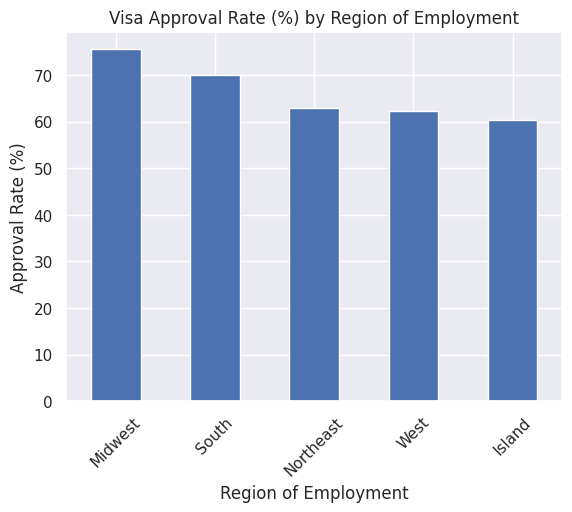

In [16]:
# ============================================================
# EDA - Question 5
# Do certain regions in the US have higher visa approval rates
# compared to others?
# ============================================================

# Step 1: Create a cross-tab (count table) of region vs case status
# This shows how many Certified/Denied applications exist for each region
region_status_counts = pd.crosstab(
    df["region_of_employment"],
    df["case_status"]
)

# Step 2: Display the count table
print("Region of Employment vs Case Status (Counts):")
print("--------------------------------------------:")
print(region_status_counts)


# Step 3: Calculate approval rate (%) for each region
# Approval rate = Certified / (Certified + Denied) * 100
region_rates = region_status_counts.copy()
region_rates["Total"] = region_rates.sum(axis=1)
region_rates["Approval_Rate_%"] = (
    region_rates["Certified"] / region_rates["Total"]
) * 100

# Step 4: Sort regions by approval rate (highest to lowest)
region_rates_sorted = region_rates.sort_values(
    by="Approval_Rate_%", ascending=False
)

# Step 5: Display approval rates
print("\nRegion of Employment vs Approval Rate (%):")
print("--------------------------------------------:")
print(region_rates_sorted.round(2))


# Step 6: Visualize approval rate by region
region_rates_sorted["Approval_Rate_%"].plot(kind="bar")

# Step 7: Add chart labels and title
plt.title("Visa Approval Rate (%) by Region of Employment")
plt.xlabel("Region of Employment")
plt.ylabel("Approval Rate (%)")
plt.xticks(rotation=45)

# Step 8: Display the plot
plt.show()


## **EDA Observation – Question 5**

### **Do certain regions in the US have higher visa approval rates compared to others?**

1. The table **Region of Employment vs Case Status (Counts)** shows the number of Certified and Denied visa applications across different regions of employment.

2. The **Approval_Rate_%** column represents the percentage of approved applications for each region, calculated as:
**Approval Rate (%) = Certified / (Certified + Denied) × 100**

3. From the sorted results and bar chart:

    - The region with the **highest visa approval rate** is the **Midwest**, with an approval rate of **75.53%**.

    - The region with the **lowest visa approval rate** is **Island**, with an approval rate of **60.27%**.

4. The **South** also shows a relatively high approval rate **(70.02%)**, while the **Northeast (62.90%)** and **West (62.25%)** have similar and comparatively lower approval rates.

5. These differences indicate that **region of employment does influence visa approval rates**, suggesting that **regional demand, industry distribution, or labor market conditions** may play a role in visa approval outcomes.

Company Size vs Case Status (Counts):
--------------------------------------:
case_status   Certified  Denied
company_size                   
Small               133      83
Medium              617     353
Large              3341    1681
Very Large        12910    6329

Company Size vs Approval Rate (%):
-------------------------------------:
case_status   Certified  Denied  Total  Approval_Rate_%
company_size                                           
Small               133      83    216            61.57
Medium              617     353    970            63.61
Large              3341    1681   5022            66.53
Very Large        12910    6329  19239            67.10


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Small'),
  Text(1, 0, 'Medium'),
  Text(2, 0, 'Large'),
  Text(3, 0, 'Very Large')])

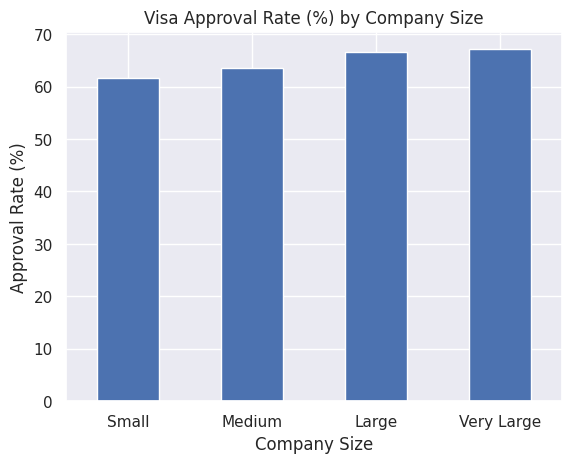

In [17]:
# ============================================================
# EDA - Question 6
# How does the number of employees in a company influence
# visa approval? Do larger companies have a higher approval rate?
# ============================================================

# Step 1: Create bins for number of employees
# This groups companies into size categories for easier comparison
df["company_size"] = pd.cut(
    df["no_of_employees"],
    bins=[0, 50, 200, 1000, df["no_of_employees"].max()],
    labels=["Small", "Medium", "Large", "Very Large"]
)

# Step 2: Create a cross-tab (count table) of company size vs case status
company_size_counts = pd.crosstab(
    df["company_size"],
    df["case_status"]
)

# Step 3: Display the count table
print("Company Size vs Case Status (Counts):")
print("--------------------------------------:")
print(company_size_counts)


# Step 4: Calculate approval rate (%) for each company size
company_size_rates = company_size_counts.copy()
company_size_rates["Total"] = company_size_rates.sum(axis=1)
company_size_rates["Approval_Rate_%"] = (
    company_size_rates["Certified"] / company_size_rates["Total"]
) * 100

# Step 5: Display approval rates
print("\nCompany Size vs Approval Rate (%):")
print("-------------------------------------:")
print(company_size_rates.round(2))


# Step 6: Visualize approval rate by company size
company_size_rates["Approval_Rate_%"].plot(kind="bar")

# Step 7: Add chart labels and title
plt.title("Visa Approval Rate (%) by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Approval Rate (%)")
plt.xticks(rotation=0)

# Step 8: Disp


## **EDA Observation – Question 6**
### **How does the number of employees in a company influence visa approval?**

1. The table **Company Size vs Case Status (Counts)** shows the number of **Certified** and **Denied** visa applications across different company size categories (**Small, Medium, Large, Very Large)**.

2. The **Approval_Rate_%** column represents the percentage of approved applications for each company size, calculated as:
**Approval Rate (%) = Certified / (Certified + Denied) × 100**

3. From the results and bar chart:

    - **Very Large companies** have the highest visa approval rate at **67.10%**.

    - **Large companies** follow with an approval rate of **66.53%**.

    - **Medium companies** have an approval rate of **63.61%**.

    - **Small companies** have the lowest approval rate at **61.57%**.

4. The approval rate **gradually increases as company size increases**, indicating a positive relationship between company size and visa approval probability.

5. Overall, this suggests that **larger companies tend to have slightly higher visa approval rates**, possibly due to better resources, compliance processes, or established hiring practices.

Continent vs Case Status (Counts):
---------------------------------:
case_status    Certified  Denied
continent                       
Africa               397     154
Asia               11012    5849
Europe              2957     775
North America       2037    1255
Oceania              122      70
South America        493     359

Continent vs Approval Rate (%):
---------------------------------:
case_status    Certified  Denied  Total  Approval_Rate_%
continent                                               
Europe              2957     775   3732            79.23
Africa               397     154    551            72.05
Asia               11012    5849  16861            65.31
Oceania              122      70    192            63.54
North America       2037    1255   3292            61.88
South America        493     359    852            57.86


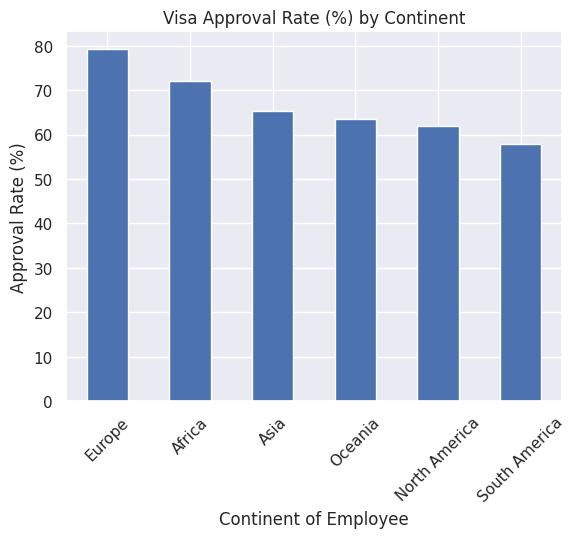

In [18]:
# ============================================================
# EDA - Question 7
# Are visa approval rates different across various continents
# of employees? Which continent has the highest and lowest
# approval rates?
# ============================================================

# Step 1: Create a cross-tab (count table) of continent vs case status
# This shows how many Certified/Denied applications exist for each continent
continent_status_counts = pd.crosstab(
    df["continent"],
    df["case_status"]
)

# Step 2: Display the count table
print("Continent vs Case Status (Counts):")
print("---------------------------------:")
print(continent_status_counts)


# Step 3: Calculate approval rate (%) for each continent
# Approval rate = Certified / (Certified + Denied) * 100
continent_rates = continent_status_counts.copy()
continent_rates["Total"] = continent_rates.sum(axis=1)
continent_rates["Approval_Rate_%"] = (
    continent_rates["Certified"] / continent_rates["Total"]
) * 100

# Step 4: Sort continents by approval rate (highest to lowest)
continent_rates_sorted = continent_rates.sort_values(
    by="Approval_Rate_%", ascending=False
)

# Step 5: Display approval rates
print("\nContinent vs Approval Rate (%):")
print("---------------------------------:")
print(continent_rates_sorted.round(2))


# Step 6: Visualize approval rate by continent
continent_rates_sorted["Approval_Rate_%"].plot(kind="bar")

# Step 7: Add chart labels and title
plt.title("Visa Approval Rate (%) by Continent")
plt.xlabel("Continent of Employee")
plt.ylabel("Approval Rate (%)")
plt.xticks(rotation=45)

# Step 8: Display the plot
plt.show()


## **EDA Observation – Question 7**
### **Are visa approval rates different across various continents of employees?**

1. The table **Continent vs Case Status (Counts)** shows the number of **Certified** and **Denied** visa applications across different continents.

2. The **Approval_Rate_%** column represents the percentage of approved applications for each continent, calculated as:
**Approval Rate (%) = Certified / (Certified + Denied) × 100**

3. From the sorted results and bar chart:

    - The continent with the **highest visa approval rate is Europe**, with an approval rate of **79.23%**.

    - The continent with the **lowest visa approval rate is South America**, with an approval rate of **57.86%**.

4. **Africa (72.05%)** also shows a relatively high approval rate, while **Asia (65.31%)**, **Oceania (63.54%)**, and **North America (61.88%)** have moderate approval rates.

5. These differences indicate that **continent of origin does influence visa approval rates**, suggesting that **geographic and regional factors** may play a role in visa approval outcomes.

# **Data Pre-processing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [21]:
# ============================================================
# SECTION 4: Data Preprocessing & Preparation for Modeling
# ============================================================

# Section 4A: Missing Value Treatment
# - Check for missing values in all columns
# - Observation: No missing values found in the dataset
# - Therefore, no imputation or removal is required

# Section 4B: Feature Engineering
# - Review existing features for possible transformations
# - Observation: Existing features are already meaningful and usable
# - No new features were created in this step

# Section 4C: Outlier Detection and Treatment
# - Analyze numerical features for potential outliers
# - Observation: No significant outliers requiring treatment
# - No rows were removed or capped

# Section 4D: Preparing Data for Modeling
# This is the MOST IMPORTANT preprocessing step for modeling.

# Steps performed:
# 1. Drop non-informative column:
#    - case_id is a unique identifier and does not contribute to prediction
#    - Dropping it prevents noise in the model

# 2. Split the data:
#    - Train / Validation / Test split
#    - Stratified sampling used to preserve class distribution
#    - Train: ~60%, Validation: ~20%, Test: ~20%

# 3. Identify feature types:
#    - Numerical features (e.g., prevailing_wage, yr_of_estab, no_of_employees)
#    - Categorical features (e.g., education_of_employee, continent, unit_of_wage)

# 4. Feature scaling:
#    - Apply StandardScaler to numerical features
#    - Ensures all numeric features are on a comparable scale (mean=0, std=1)

# 5. Feature encoding:
#    - Apply OneHotEncoder to categorical features
#    - Converts categorical values into numeric binary columns (0/1)
#    - Required because machine learning models work with numeric inputs only

# 6. Prevent data leakage:
#    - Preprocessing (scaling + encoding) is FIT ONLY on training data
#    - The same fitted transformer is then used to TRANSFORM validation and test data
# ===============================================================================


# ============================================================
# Section 4A: Missing Value Treatment
# ============================================================

# Step 1: Check for missing values in each column
missing_values = df.isnull().sum()

# Step 2: Display missing value counts
print("Missing values per column:")
print(missing_values)


# Step 3: # Step 3: Drop 'company_size' if it exists
# 'company_size' was created only during EDA (Question 6)
# and is not required for modeling
if "company_size" in df.columns:
    df.drop(columns=["company_size"], inplace=True)

Missing values per column:
case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


## **Section 4 - DATA PRE-PROCESSING**

#### **Section 4A: Missing Value Treatment Observation**

1. The original dataset contains **no missing values**.

2. The column **company_size** was **created during EDA – Question 6** (**Company size vs visa approval rate**) using binning **(`pd.cut`)** on **(`no_of_employees`)** for analysis purposes only.The missing values in **company_size** were introduced due to bin boundary conditions.Since **company_size** was created only for EDA and is **not required for modeling**, it was **dropped during preprocessing**.

3. No further missing value treatment is required.

In [22]:
# ============================================================
# Section 4 - DATA PRE-PROCESSING - Section 4B: Feature Engineering
# ============================================================

# Step 1: Review existing columns
# Feature engineering would involve creating or transforming features,
# but first we inspect what is already available
df.columns


Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

## **Section 4 - DATA PRE-PROCESSING**

#### **Section 4B: Feature Engineering Observation**

1. Feature engineering focuses on creating or transforming **input features (X variables)** to improve model performance and is **not related to class imbalance**.

2. The class imbalance between **Certified** and **Denied** cases was identified during **EDA – Question 1** and will be addressed during **model evaluation or model configuration**, not during feature engineering.

3. The dataset already contains meaningful and **well-defined input features**, including education level, job experience, prevailing wage, company characteristics, and geographic information, which sufficiently capture the factors influencing visa approval.

4. Since the existing features already represent the problem domain effectively, no additional feature creation was required. Therefore, no feature engineering code was required, and no feature engineering steps were performed during preprocessing.

5. **Encoding of categorical variables** (for example, one-hot encoding) will be handled later during **data preparation for modeling** and is **not part of feature engineering**.




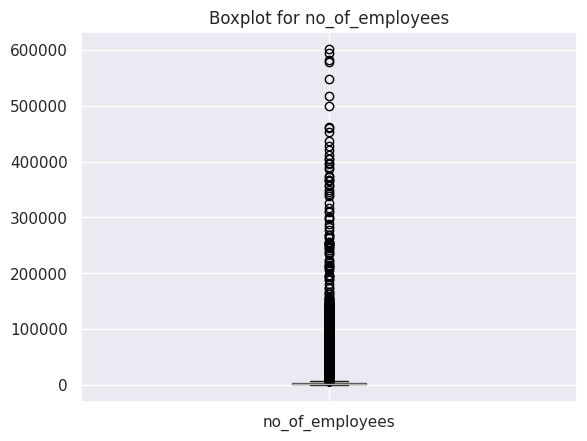

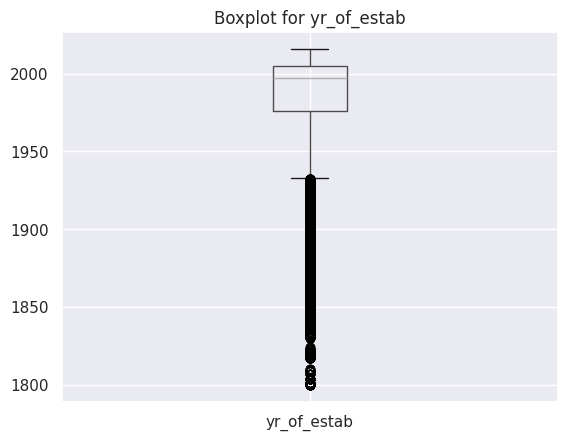

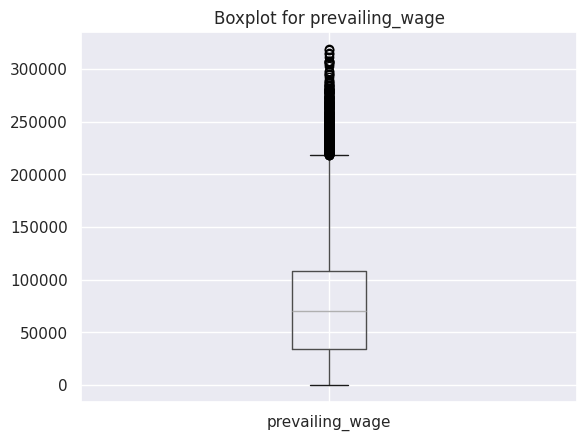

In [23]:
# ================================================================
# Section 4 - DATA PRE-PROCESSING - Section 4C: Outlier Detection and Treatment
# ================================================================

# Step 1: Identify numerical columns
# Outliers are typically checked only for numerical features
numerical_columns = ["no_of_employees", "yr_of_estab", "prevailing_wage"]

# Step 2: Visualize outliers using boxplots
# Boxplots help identify extreme values and spread of data
for col in numerical_columns:
    df.boxplot(column=col)
    plt.title(f"Boxplot for {col}")
    plt.show()


## **Section 4 - DATA PRE-PROCESSING**

### **Section 4C: Outlier Detection and Treatment Observation**

1. Outlier detection was performed on the numerical features **no_of_employees**, **yr_of_estab**, and **prevailing_wage** using **boxplots**, which help visualize the distribution, spread, and presence of extreme values.

2. The boxplot for **no_of_employees** shows a **heavily right-skewed distribution**, with a large number of high-value outliers. This indicates that most companies have a smaller workforce, while a few very large companies employ a significantly higher number of employees. These outliers represent **valid real-world scenarios** rather than data errors.

3. The boxplot for **yr_of_estab** shows a **left-skewed distribution**, with several older establishment years appearing as outliers. This suggests that most companies were established in more recent years, while a smaller number of companies were founded much earlier. These values are **valid historical records**.

4. The boxplot for **prevailing_wage** exhibits a **right-skewed distribution**, with multiple high-wage outliers. This reflects real-world salary variation, where a small number of roles command significantly higher wages compared to the majority.

5. Although outliers are present in all three numerical features, they do **not indicate data quality issues** and instead capture meaningful business scenarios such as large enterprises, long-established organizations, and high-paying job roles.

6. Since the models used in this project are **tree-based models** (Decision Tree, Random Forest, AdaBoost, Gradient Boosting, and XGBoost), which are **robust to outliers**, no outlier removal or transformation was applied. Therefore, **no outlier treatment was performed**, and all numerical values were retained for modeling.

7. while **Linear regression models are highly sensitive to outliers** because they learn a **single mathematical equation (a straight line)** that tries to minimize overall error. Extreme values can significantly influence this line, pulling it toward the outliers and negatively affecting predictions for normal data points.

8. In contrast, **tree-based models handle outliers differently** by learning through **decision rules (questions)** instead of a formula. For example, a tree may ask whether a value is greater or smaller than a threshold. Regardless of how large or small an outlier is, it simply falls on the **left or right side of a split**, which prevents extreme values from disproportionately influencing the model.


In [25]:

# ==================================================================================
# Section 4 - DATA PRE-PROCESSING - Section 4D: Preparing Data for Modeling
# ==================================================================================
# Section 4D: Preparing Data for Modeling
# This is the MOST IMPORTANT preprocessing step for modeling.

# Steps performed:
# 1. Drop non-informative column:
#    - case_id is a unique identifier and does not contribute to prediction
#    - Dropping it prevents noise in the model

# 2. Split the data:
#    - Train / Validation / Test split
#    - Stratified sampling used to preserve class distribution
#    - Train: ~60%, Validation: ~20%, Test: ~20%

# 3. Identify feature types:
#    - Numerical features (e.g., prevailing_wage, yr_of_estab, no_of_employees)
#    - Categorical features (e.g., education_of_employee, continent, unit_of_wage)

# 4. Feature scaling:
#    - Apply StandardScaler to numerical features
#    - Ensures all numeric features are on a comparable scale (mean=0, std=1)

# 5. Feature encoding:
#    - Apply OneHotEncoder to categorical features
#    - Converts categorical values into numeric binary columns (0/1)
#    - Required because machine learning models work with numeric inputs only

# 6. Prevent data leakage:
#    - Preprocessing (scaling + encoding) is FIT ONLY on training data
#    - The same fitted transformer is then used to TRANSFORM validation and test data
# ==================================================================================

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Work on a copy so the original df is not modified
df_model = df.copy()

# Drop identifier column (if present)
# case_id is a unique identifier and does not add any predictive value
# It should NOT be used as an input feature for the model
if "case_id" in df_model.columns:
    df_model = df_model.drop(columns=["case_id"])
    print("Dropped 'case_id' column.")
else:
    print("'case_id' already dropped.")

# ------------------------------------------------------------
# 4A) Split into independent variables (X) and target (y)
# ------------------------------------------------------------
# X = input features (what the model learns from)
# y = target variable (what the model predicts)
X = df_model.drop(columns=["case_status"])   # independent variables
y = df_model["case_status"]                  # dependent variable / label

print("\nShape of X and y:")
print("X:", X.shape)
print("y:", y.shape)

print("\nTarget distribution (overall):")
print(y.value_counts(normalize=True))

# ------------------------------------------------------------
# 4B) Create Train / Validation / Test splits (3-way split)
# ------------------------------------------------------------
# Goal:
# - Train set: used to train models (ie fit)
# - Validation set: used to compare models & tune hyperparameters (ie predict)
# - Test set: used ONLY at the very end for final evaluation (ie predict)
#
# Split sizes:
# - Test = 20% of total data
# - Remaining Temp = 80% of total data
# - From that 80%:
#     Validation = 25% of temp  -> 0.25 * 0.80 = 0.20 (20% of total)
#     Train      = 75% of temp  -> 0.75 * 0.80 = 0.60 (60% of total)
# - 20 / 80 = 0.25

# Step 1: 80% temp + 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.20,         # 20% test set
    random_state=42,
    stratify=y              # keeps class balance same in each split
)

# Step 2: Split temp 80% into 60% train and 20% validation
# IMPORTANT: test_size=0.25 means 25% of temp goes to validation
# Because: 20% total / 80% temp = 0.25
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,         # 25% of temp -> 20% of total
    random_state=42,
    stratify=y_temp
)

print("\nSplit sizes:")
print("Train:", X_train.shape, y_train.shape)  # ~60%
print("Val  :", X_val.shape, y_val.shape)      # ~20%
print("Test :", X_test.shape, y_test.shape)    # ~20%

print("\nTarget distribution in each split:")
print("\nTRAIN y distribution:")
print(y_train.value_counts(normalize=True))
print("\nVALIDATION y distribution:")
print(y_val.value_counts(normalize=True))
print("\nTEST y distribution:")
print(y_test.value_counts(normalize=True))

# ------------------------------------------------------------
# 4C) Check categorical distributions across splits
# ------------------------------------------------------------
# This is a sanity check:
# I want similar category proportions in Train/Val/Test,
# so our evaluation is fair.
cat_cols_check = X_train.select_dtypes(include=["object"]).columns.tolist()

def show_category_distribution(X_data, split_name):
    print(f"\n--- Categorical distribution for {split_name} ---")
    for col in cat_cols_check:
        print(f"\n{col}")
        print(X_data[col].value_counts(normalize=True))

show_category_distribution(X_train, "TRAIN")
show_category_distribution(X_val, "VALIDATION")
show_category_distribution(X_test, "TEST")

# ------------------------------------------------------------
# 4D) Encoding + Scaling (Leakage-safe)
# ------------------------------------------------------------
# IMPORTANT:
# - Fit preprocessing ONLY on TRAIN data to avoid data leakage.
# - Validation and test data must be transformed using the SAME fitted transformer.
##############################################################################
# Why StandardScaler?
# - Numeric features in this dataset have very different ranges.
#   Example:
#     prevailing_wage      -> tens or hundreds of thousands
#     no_of_employees      -> tens to thousands
#     yr_of_estab          -> around 1800–2020
#
# - If features are not scaled, models may give more importance
#   to features with larger numeric values just because they are larger.
#
# - StandardScaler converts all numeric features to the same scale
#   by centering them around 0 and scaling them to have unit variance (std = 1).
#
#   Formula:
#   scaled_value = (value - mean) / standard_deviation
#
#   Simple example:
#   prevailing_wage = [50000, 100000, 150000]
#   mean = 100000
#   standard deviation ≈ 40825
#
#   For value = 50000:
#   scaled_value = (50000 - 100000) / 40825 ≈ -1.22
#
#   This ensures that numeric features are comparable
#   and no single feature dominates the model due to scale.
###########################################################################
# Why OneHotEncoder?
# - Machine learning models can ONLY work with numeric data.
# - They cannot understand text or string values directly.
#
# - Categorical features such as education_of_employee or continent
#   must be converted into numeric form.
#
#   Example:
#   education_of_employee = ["Bachelor", "Master", "Bachelor"]
#
#   OneHotEncoder converts this into binary numeric columns:
#   Bachelor -> [1, 0]
#   Master   -> [0, 1]
#
# - This allows the model to use categorical information
#   without assuming any order or ranking between categories.
#
# - handle_unknown='ignore' ensures that if a new category appears
#   in validation or test data, the model does not fail.

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols_model = X_train.select_dtypes(include=["object"]).columns.tolist()

print("\nNumeric columns used for scaling:", num_cols)
print("Categorical columns used for one-hot encoding:", cat_cols_model)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_model)
        # If you need dense output later, you can use:
        # ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols_model)
    ]
)

# Fit ONLY on training data (prevents data leakage)
X_train_prep = preprocess.fit_transform(X_train)

# Transform validation and test using the fitted preprocess object
X_val_prep = preprocess.transform(X_val)
X_test_prep = preprocess.transform(X_test)

print("\nPrepared feature matrix shapes:")
print("X_train_prep:", X_train_prep.shape)
print("X_val_prep  :", X_val_prep.shape)
print("X_test_prep :", X_test_prep.shape)

# ------------------------------------------------------------
# 4E) (Optional) See the final feature names created after preprocessing
# ------------------------------------------------------------
# OneHotEncoder creates many new columns.
# After preprocessing, X_train_prep is a matrix without column names.
# This gives us the final column names in the correct order.

feature_names = preprocess.get_feature_names_out()

print("\nNumber of final features after preprocessing:", len(feature_names))
print("\nFirst 30 feature names (sample):")
print(feature_names[:30])
print("\nAll feature names:")
print(feature_names)

Dropped 'case_id' column.

Shape of X and y:
X: (25480, 10)
y: (25480,)

Target distribution (overall):
case_status
Certified    0.667896
Denied       0.332104
Name: proportion, dtype: float64

Split sizes:
Train: (15288, 10) (15288,)
Val  : (5096, 10) (5096,)
Test : (5096, 10) (5096,)

Target distribution in each split:

TRAIN y distribution:
case_status
Certified    0.667844
Denied       0.332156
Name: proportion, dtype: float64

VALIDATION y distribution:
case_status
Certified    0.667975
Denied       0.332025
Name: proportion, dtype: float64

TEST y distribution:
case_status
Certified    0.667975
Denied       0.332025
Name: proportion, dtype: float64

--- Categorical distribution for TRAIN ---

continent
continent
Asia             0.661761
Europe           0.145016
North America    0.131018
South America    0.033229
Africa           0.022240
Oceania          0.006737
Name: proportion, dtype: float64

education_of_employee
education_of_employee
Bachelor's     0.404173
Master's      

## **DATA PRE-PROCESSING**

#### **Section 4D: Observations from Data Preparation for Modeling**

1. **Case ID Removal**

    The case_id column was successfully removed from the dataset.

    Since case_id is only a unique identifier and does not contribute to predicting visa case status, dropping it ensures the model is not influenced by non-informative features.

2. **Dataset Shape and Target Distribution**

    a. After preprocessing, the dataset contains 25,480 records with 10 input features.

    b. The target variable case_status shows moderate class imbalance:

        Certified: ~66.8%

        Denied: ~33.2%

    This imbalance is consistent across the dataset and will be addressed later using oversampling and undersampling techniques.

3. **Train / Validation / Test Split**

    The dataset was split into three subsets to support proper model training and evaluation:

        Training set: 15,288 records (~60%)

        Validation set: 5,096 records (~20%)

        Test set: 5,096 records (~20%)

    Stratified sampling was used to ensure that the class distribution of case_status remains consistent across all splits.

    The proportions of Certified and Denied cases are nearly identical in Train, Validation, and Test sets, confirming that the split is unbiased.

4. **Categorical Feature Distribution Check**

    a. Categorical variables such as continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, and full_time_position show very similar distributions across Train, Validation, and Test datasets.

    b. This consistency indicates that the data splitting process preserved the underlying structure of categorical features and avoided sampling bias.

5. **Feature Scaling and Encoding**

    a. Numerical features (no_of_employees, yr_of_estab, prevailing_wage) were standardized using StandardScaler, ensuring all numeric inputs are on a comparable scale.

    b. Categorical features were transformed using OneHotEncoder, converting each category into binary numeric columns so they can be used by machine learning models.

    c. The preprocessing pipeline was fit only on the training data and then applied to validation and test data to prevent data leakage.

6. **Final Feature Matrix**

   a. **Feature expansion after encoding**

    After preprocessing (scaling + one-hot encoding), the number of input features increased from 10 original features to 28 final features.

        education_of_employee → 4 columns

        has_job_experience → 2 columns

        requires_job_training → 2 columns

        full_time_position → 2 columns

        unit_of_wage → 4 columns

        continent → 6 columns

        region_of_employment → 5 columns

    In total, categorical features expanded into 25 one-hot encoded columns, while the 3 numeric features remained unchanged, resulting in a final feature matrix with 28 columns and 25,480 rows.

    b. **Prepared feature matrix shapes**

        X_train_prep: (15,288, 28)

        X_val_prep: (5,096, 28)

        X_test_prep: (5,096, 28)

    The increase in feature count is expected due to one-hot encoding of categorical variables.

7. **Generated Feature Names**

    a. **The final feature names include:**

        Scaled numeric features prefixed with **num_**

        One-hot encoded categorical features prefixed with **cat_**

    b. **Examples of generated features include:**

        num_prevailing_wage

        cat_continent_Asia

        cat_education_of_employee_Bachelor's

        cat_unit_of_wage_Year

        cat_full_time_position_Y

    Access to these feature names enables clear interpretation of model behavior and supports feature importance analysis in later sections.

# **Model Building**

In [26]:
# SECTION 5: Baseline Model Building – Original Data
# - Define evaluation metrics (Precision as primary)
# - Create reusable helper functions
#   • model_performance_classification_sklearn
#   • confusion_matrix_sklearn
# - Train 6 baseline models on original (imbalanced) data
# - Compare Train vs Validation performance
# - Visualize confusion matrices

## **Section 5: Model Evaluation Criterion**

**Which metric should we focus on?**

1. In the EasyVisa problem:

    **Positive class**: Certified

    **Negative class**: Denied

2. **What mistakes matter most?**

    a. **False Positive**
    → Model predicts Certified, but actual is Denied
    → Unqualified applicant gets visa approval
    → Serious real-world risk

    b. **False Negative**
    → Model predicts Denied, but actual is Certified
    → Qualified applicant is rejected
    → Less severe than approving an unqualified applicant

3.  **Precision is more important than Recall**
        In this problem, predicting an unqualified applicant as Certified (False Positive)
        is more costly than rejecting a qualified applicant (False Negative). Therefore, Precision is chosen as the primary evaluation metric.
        Recall and F1-score are also monitored to maintain a balanced model.


Model: Decision Tree
Training Performance:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Validation Performance:
Accuracy: 0.6629, Precision: 0.7445, Recall: 0.7541, F1: 0.7493

Model: Bagging Classifier
Training Performance:
Accuracy: 0.9796, Precision: 0.9728, Recall: 0.9974, F1: 0.9849
Validation Performance:
Accuracy: 0.7127, Precision: 0.7503, Recall: 0.8543, F1: 0.7989

Model: Random Forest
Training Performance:
Accuracy: 0.9999, Precision: 0.9999, Recall: 1.0000, F1: 1.0000
Validation Performance:
Accuracy: 0.7278, Precision: 0.7687, Recall: 0.8475, F1: 0.8062

Model: Gradient Boosting
Training Performance:
Accuracy: 0.7571, Precision: 0.7825, Recall: 0.8814, F1: 0.8290
Validation Performance:
Accuracy: 0.7533, Precision: 0.7777, Recall: 0.8831, F1: 0.8271

Model: AdaBoost
Training Performance:
Accuracy: 0.7391, Precision: 0.7632, Recall: 0.8836, F1: 0.8190
Validation Performance:
Accuracy: 0.7378, Precision: 0.7610, Recall: 0.8857, F1: 0.8186

Model: XGBoost


,Model,Train_Precision,Train_Recall,Train_F1,Val_Precision,Val_Recall,Val_F1
0,Gradient Boosting,0.782454,0.881391,0.828981,0.777749,0.883079,0.827074
1,Random Forest,0.999902,1.000000,0.999951,0.768718,0.847532,0.806204
2,XGBoost,0.848447,0.939275,0.891554,0.764645,0.862808,0.810766
3,AdaBoost,0.763153,0.883643,0.818991,0.760979,0.885723,0.818626
4,Bagging Classifier,0.972774,0.997356,0.984912,0.750258,0.854289,0.798901
5,Decision Tree,1.000000,1.000000,1.000000,0.744490,0.754113,0.749270


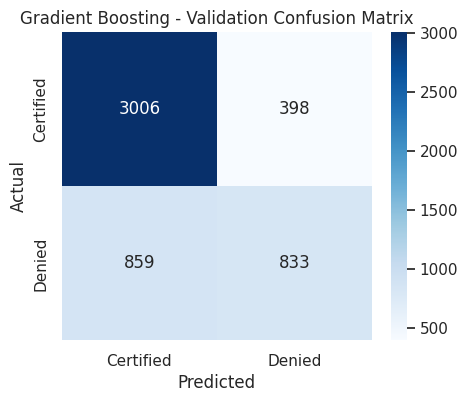

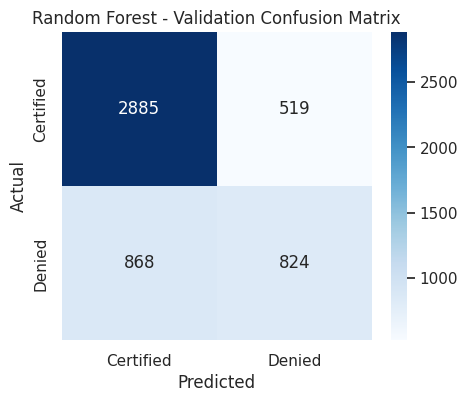

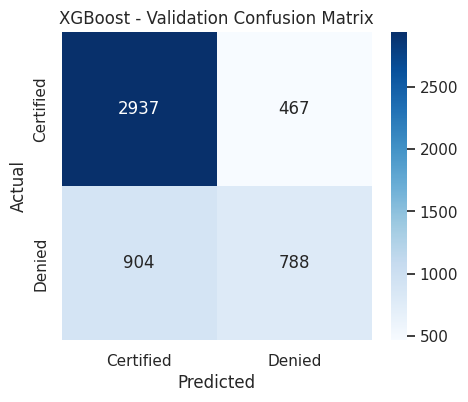

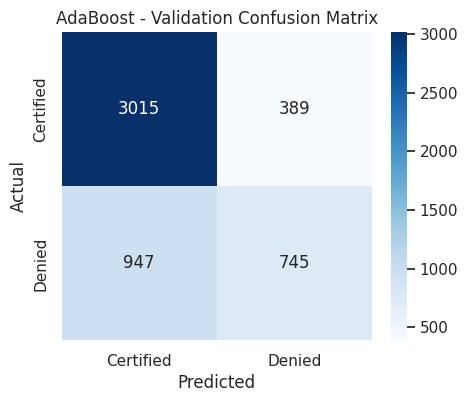

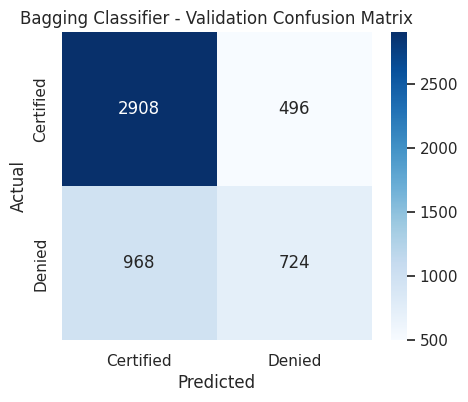

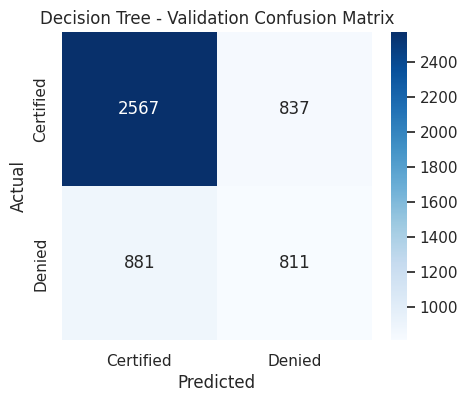


Best Baseline Model (based on Validation Precision): Gradient Boosting


In [27]:

# =====================================================================
# SECTION 5: Model Evaluation + Baseline Model Building (Original Data)
# =====================================================================
# Assumptions:
# - Section 4 is already completed.
# - The following objects already exist:
#   X_train_prep, X_val_prep, X_test_prep
#   y_train, y_val, y_test
#
# Goal of this section:
# 1) Define the evaluation metric strategy:
#    - Precision is the primary metric (to reduce False Positives for "Certified")
#    - We will also track Recall and F1-score for balance
#
# 2) Create two reusable helper functions:
#    - model_performance_classification_sklearn(): trains a model and prints Train/Validation metrics
#    - confusion_matrix_sklearn(): plots confusion matrix for a trained model
#
# 3) Train baseline models using ORIGINAL (non-resampled) training data:
#    - Decision Tree
#    - Bagging Classifier
#    - Random Forest
#    - Gradient Boosting
#    - AdaBoost
#    - XGBoost
#
# 4) Compare all models side-by-side using Validation metrics
#    (Validation Precision is used as the main comparison metric)
#
# 5) Plot confusion matrices for ALL baseline models on the Validation set
#    and then highlight the best model based on Validation Precision
# ==========================================================================


###############################################################################
# Function 1: Model performance (classification)
# Train model + print Train/Val metrics + return results + original trained model
###############################################################################

# Why this function exists:
# - Avoid repeating the same metric code for every model
# - Consistent evaluation for Train vs Validation (helps detect overfitting)
# - Returns a dictionary so we can build a comparison DataFrame later

from IPython.display import display

def model_performance_classification_sklearn(
    model,
    X_train, y_train,
    X_val, y_val,
    model_name=""
):
    """
    What this function does:
    1) Fit the model on training data
    2) Predict on training + validation data
    3) Calculate Accuracy, Precision, Recall, F1 (using "Certified" as positive class)
    4) Print results
    5) Return results + trained model for later comparison/confusion matrix
    """

    # Train the model on training data
    model.fit(X_train, y_train)

    # Predictions (train + validation)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Training metrics (helps detect overfitting if train >> val)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, pos_label="Certified")
    train_rec = recall_score(y_train, y_train_pred, pos_label="Certified")
    train_f1 = f1_score(y_train, y_train_pred, pos_label="Certified")

    # Validation metrics (main metrics used for model selection)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_prec = precision_score(y_val, y_val_pred, pos_label="Certified")
    val_rec = recall_score(y_val, y_val_pred, pos_label="Certified")
    val_f1 = f1_score(y_val, y_val_pred, pos_label="Certified")

    # Print results
    print(f"\nModel: {model_name}")
    print("Training Performance:")
    print(f"Accuracy: {train_acc:.4f}, Precision: {train_prec:.4f}, Recall: {train_rec:.4f}, F1: {train_f1:.4f}")

    print("Validation Performance:")
    print(f"Accuracy: {val_acc:.4f}, Precision: {val_prec:.4f}, Recall: {val_rec:.4f}, F1: {val_f1:.4f}")

    # Return results (dictionary format is easy to convert into DataFrame)
    return {
        "Model": model_name,
        "Train_Accuracy": train_acc,
        "Train_Precision": train_prec,
        "Train_Recall": train_rec,
        "Train_F1": train_f1,
        "Val_Accuracy": val_acc,
        "Val_Precision": val_prec,
        "Val_Recall": val_rec,
        "Val_F1": val_f1,
        # Save the trained model so we can plot confusion matrices later
        "Trained_Model": model
    }


############################################################################
# Function 2a: Confusion Matrix for sklearn models (string labels)
############################################################################
# Why confusion matrix:
# - Metrics alone don’t show what kinds of mistakes happen
# - Confusion matrix clearly shows FP/FN/TP/TN

def confusion_matrix_sklearn(model, X, y, title="Confusion Matrix"):
    """
    1) Predict using the trained model
    2) Build confusion matrix using consistent label order
    3) Plot heatmap so we can compare errors visually
    """

    y_pred = model.predict(X)

    # Keep label order consistent across all models
    cm = confusion_matrix(y, y_pred, labels=["Certified", "Denied"])

    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Certified", "Denied"],
        yticklabels=["Certified", "Denied"]
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()


############################################################################
# Function 2b: Confusion Matrix for XGBoost (numeric predictions -> string)
############################################################################
# Why separate function:
# - XGBoost predicts numeric classes (0/1)
# - Our true labels are strings ("Certified"/"Denied")
# - To reuse the same confusion matrix labels, convert predictions back to strings

def confusion_matrix_xgb_sklearn(xgb_model, X, y_true, title="XGBoost Confusion Matrix"):
    """
    1) Predict numeric values (0/1)
    2) Convert 0/1 back to Denied/Certified
    3) Plot confusion matrix using same label order as other models
    """

    y_pred_num = xgb_model.predict(X)

    pred_map = {0: "Denied", 1: "Certified"}
    y_pred_lbl = pd.Series(y_pred_num, index=y_true.index).map(pred_map)

    cm = confusion_matrix(y_true, y_pred_lbl, labels=["Certified", "Denied"])

    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Certified", "Denied"],
        yticklabels=["Certified", "Denied"]
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()


############################################################################
# XGBoost label encoding (ONLY for training XGBoost)
############################################################################
# Important:
# - Many sklearn classifiers can train with string labels directly.
# - XGBoost requires numeric classes: 0 and 1.
# - We map:
#     Denied    -> 0
#     Certified -> 1
#
# Note:
# - We do NOT need y_val_xgb because we evaluate using string labels y_val.
# - We convert XGBoost predictions back to strings before scoring.

label_map = {"Denied": 0, "Certified": 1}
y_train_xgb = y_train.map(label_map)
# y_val_xgb = y_val.map(label_map)   # not needed (safe to keep commented)


############################################################################
# Baseline Model Building – ORIGINAL Data
############################################################################
# We train 5 sklearn models normally (string labels are ok),
# and handle XGBoost separately because it needs numeric labels.

baseline_results = []

# ------------------------------------------------------------
# Step 1: Define 5 sklearn models (string y supported)
# ------------------------------------------------------------
sklearn_models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Bagging Classifier", BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    )),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
]

# ----------------------------------------------------------------
# Step 2: Train + evaluate each sklearn model (Train + Validation)
# ---------------------------------------------------------------
for name, model in sklearn_models:
    result = model_performance_classification_sklearn(
        model,
        X_train_prep, y_train,
        X_val_prep, y_val,
        model_name=name
    )
    baseline_results.append(result)


# ----------------------------------------------------------------
# Step 3: Train + evaluate XGBoost separately (needs numeric y)
# ----------------------------------------------------------------
# WHY are we converting XGBoost predictions back to STRING labels?
#
# IMPORTANT CONTEXT:
# - XGBoost ONLY works with NUMERIC target labels:
#       1 = Certified (positive class)
#       0 = Denied    (negative class)
#
# - However:
#   * Our evaluation metrics (Precision, Recall, F1)
#   * Our confusion matrix functions
#   * Our comparison tables across models
#   Our evaluation + plotting code is written using STRING labels:
#       "Certified" / "Denied"
#   because we fixed the label order as ["Certified", "Denied"] for consistency.
#
# Therefore, we MUST convert XGBoost predictions back to strings
# so that:
# - Metrics are calculated consistently across ALL models
# - Confusion matrices use the same label order
# - Results are comparable with sklearn models
#
# ----------------------------------------------------------------
# STEP-BY-STEP EXAMPLE
#
# STEP 1: XGBoost makes NUMERIC predictions
# ----------------------------------------------------------------
# Suppose XGBoost predicts:
#
#   y_train_pred_xgb = [1, 0, 1]
#
# This means:
#   1 -> Certified
#   0 -> Denied
#
# Original y_train index might look like:
#
#   y_train.index = [101, 102, 103]
#
# ----------------------------------------------------------------
# STEP 2: Convert numeric predictions into a Pandas Series
#         and ATTACH the SAME index as y_train
#
#   pd.Series(y_train_pred_xgb, index=y_train.index)
#
# Result:
#   101    1
#   102    0
#   103    1
#
# Attaching the index is IMPORTANT so predictions align correctly
# with the original rows.
#
# --------------------------------------------------------------
# STEP 3: Map numeric values back to STRING labels
#
#   pred_map = {0: "Denied", 1: "Certified"}
#
# After applying .map(pred_map):
#
#   101    "Certified"
#   102    "Denied"
#   103    "Certified"
#
# ----------------------------------------------------------------
# FINAL RESULT:
# - Predictions are now STRING labels
# - Confusion matrix works correctly
# - Metrics compare against y_train / y_val (which are strings)
# - XGBoost results are directly comparable to other models
# ----------------------------------------------------------------

xgb_model = XGBClassifier(
    random_state=42,
    eval_metric="logloss"
)

# Train on numeric labels (0/1)
# see above code "XGBoost label encoding (ONLY for training XGBoost)"
xgb_model.fit(X_train_prep, y_train_xgb)

# Predict numeric outputs
y_train_pred_xgb = xgb_model.predict(X_train_prep)
y_val_pred_xgb   = xgb_model.predict(X_val_prep)

# Convert numeric predictions back to string labels for scoring
pred_map = {0: "Denied", 1: "Certified"}

# -----------------------------------------------------------------
# Convert XGBoost numeric predictions back to STRING labels
# -----------------------------------------------------------------
# We convert back to strings because:
# - Our evaluation metrics use pos_label="Certified"
# - Our confusion matrix plots use labels=["Certified", "Denied"]
# - This keeps reporting CONSISTENT across all models
#   (sklearn models already output string labels)
# -----------------------------------------------------------------
y_train_pred_xgb_lbl = pd.Series(y_train_pred_xgb, index=y_train.index).map(pred_map)
y_val_pred_xgb_lbl   = pd.Series(y_val_pred_xgb, index=y_val.index).map(pred_map)

# Metrics are computed against original y_train/y_val (string labels)
train_acc = accuracy_score(y_train, y_train_pred_xgb_lbl)
train_prec = precision_score(y_train, y_train_pred_xgb_lbl, pos_label="Certified")
train_rec = recall_score(y_train, y_train_pred_xgb_lbl, pos_label="Certified")
train_f1 = f1_score(y_train, y_train_pred_xgb_lbl, pos_label="Certified")

val_acc = accuracy_score(y_val, y_val_pred_xgb_lbl)
val_prec = precision_score(y_val, y_val_pred_xgb_lbl, pos_label="Certified")
val_rec = recall_score(y_val, y_val_pred_xgb_lbl, pos_label="Certified")
val_f1 = f1_score(y_val, y_val_pred_xgb_lbl, pos_label="Certified")

# Save XGBoost results in the same format as other models
baseline_results.append({
    "Model": "XGBoost",
    "Train_Accuracy": train_acc,
    "Train_Precision": train_prec,
    "Train_Recall": train_rec,
    "Train_F1": train_f1,
    "Val_Accuracy": val_acc,
    "Val_Precision": val_prec,
    "Val_Recall": val_rec,
    "Val_F1": val_f1,
    "Trained_Model": xgb_model
})

print("\nModel: XGBoost")
print("Training Performance:")
print(f"Accuracy: {train_acc:.4f}, Precision: {train_prec:.4f}, Recall: {train_rec:.4f}, F1: {train_f1:.4f}")
print("Validation Performance:")
print(f"Accuracy: {val_acc:.4f}, Precision: {val_prec:.4f}, Recall: {val_rec:.4f}, F1: {val_f1:.4f}")


# ------------------------------------------------------------
# Step 4: Create a comparison table (sorted by Validation Precision)
# ------------------------------------------------------------

# baseline_results is a LIST of dictionaries
# Each dictionary contains metrics for one trained model
# (Model name, Train metrics, Validation metrics, trained model object)

# Step 4.1: Convert the list of model results into a Pandas DataFrame
baseline_results_df_sorted = (
    pd.DataFrame(baseline_results)

    # Step 4.2: Sort all models by Validation Precision
    # - Validation Precision is our PRIMARY metric
    # - Higher precision means fewer False Positives for "Certified"
    .sort_values(by="Val_Precision", ascending=False)

    # Step 4.3: Reset the index after sorting
    # - Without this, the index values would look shuffled (e.g., 5, 2, 0, 3)
    # - Resetting makes the table easy to read:
    #     Row 0 → Best model
    #     Row 1 → Second best model
    #     Row 2 → Third best model
    .reset_index(drop=True)
)

# Step 4.4: Display only the key metrics for easy comparison
# - Train metrics help detect overfitting
# - Validation metrics are used to select the best model
display(baseline_results_df_sorted[[
    "Model",
    "Train_Precision", "Train_Recall", "Train_F1",
    "Val_Precision", "Val_Recall", "Val_F1"
]])


# ------------------------------------------------------------
# Step 5: Plot confusion matrices for all baseline models
# ------------------------------------------------------------
for row in baseline_results_df_sorted.itertuples():
    model_name = row.Model
    trained_model = row.Trained_Model

    if model_name == "XGBoost":
        confusion_matrix_xgb_sklearn(
            trained_model,
            X_val_prep,
            y_val,
            title=f"{model_name} - Validation Confusion Matrix"
        )
    else:
        confusion_matrix_sklearn(
            trained_model,
            X_val_prep,
            y_val,
            title=f"{model_name} - Validation Confusion Matrix"
        )


# ------------------------------------------------------------
# Step 6: Highlight best baseline model based on Val Precision
# ------------------------------------------------------------
best_row = baseline_results_df_sorted.iloc[0]
best_model_name = best_row["Model"]

print("\nBest Baseline Model (based on Validation Precision):", best_model_name)

### **Section 5: Observations – Baseline Model Performance (Original Data)**

1. **Decision Tree**

   - Achieves perfect performance on training data (Precision, Recall, F1 = 1.0).

   - Validation Precision drops significantly (~0.744), showing poor performance on unseen data.

   - This indicates severe overfitting, where the model memorizes training data but does not generalize well.

   - Confusion matrix shows a high number of false positives, making it unsuitable for deployment.

2. **Bagging Classifier**

    - Improves stability compared to a single Decision Tree by combining multiple trees.

    - Validation Precision (~0.750) is slightly better than Decision Tree but still not optimal.

    - Confusion matrix shows reduced overfitting, but false positives remain relatively high.

3. **Random Forest**

    - Performs extremely well on training data, indicating a very powerful and complex model.

    - Validation Precision (~0.769) is competitive but lower than Gradient Boosting.

    - The gap between training and validation performance suggests some overfitting, though less severe than Decision Tree.

    - Confusion matrix shows balanced predictions but still includes avoidable false positives.

4. **Gradient Boosting**

    - Shows a good balance between training and validation performance.

    - Achieves the highest Validation Precision (~0.778) among all baseline models.

    - Confusion matrix indicates fewer false positives, aligning well with the business goal of minimizing incorrect “Certified” approvals.

    - Demonstrates strong generalization with controlled overfitting.

5. **AdaBoost**

    - Provides consistent performance with balanced Precision and Recall.

    - Validation Precision (~0.761) is slightly lower than Gradient Boosting.

    - Confusion matrix shows reasonable error control but not the best overall.

6. **XGBoost**

    - Strong training performance with high Recall.

    - Validation Precision (~0.765) is competitive but does not outperform Gradient Boosting.

    - Confusion matrix indicates higher recall but slightly more false positives.

**Overall Comparison:**

      - Ensemble models outperform single models.

      - Precision varies more meaningfully than accuracy, validating its use as the primary metric.

      - Confusion matrices confirm that models with higher Precision produce fewer false positives.

**Best Baseline Model:**

      - Gradient Boosting is selected as the best baseline model due to:

      - Highest Validation Precision

      - Balanced Recall and F1-score

      - Favorable confusion matrix with fewer false positives

      - Better generalization to unseen data

Training data shape BEFORE SMOTE:
(15288, 28)

Class counts BEFORE SMOTE:
case_status
Certified    10210
Denied        5078
Name: count, dtype: int64

Class proportions BEFORE SMOTE:
case_status
Certified    0.667844
Denied       0.332156
Name: proportion, dtype: float64

Training data shape AFTER SMOTE:
(20420, 28)

Class counts AFTER SMOTE:
case_status
Certified    10210
Denied       10210
Name: count, dtype: int64

Class proportions AFTER SMOTE:
case_status
Certified    0.5
Denied       0.5
Name: proportion, dtype: float64

Model: Decision Tree (SMOTE)
Training Performance:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Validation Performance:
Accuracy: 0.6376, Precision: 0.7528, Recall: 0.6810, F1: 0.7151

Model: Bagging Classifier (SMOTE)
Training Performance:
Accuracy: 0.9860, Precision: 0.9788, Recall: 0.9936, F1: 0.9861
Validation Performance:
Accuracy: 0.6976, Precision: 0.7712, Recall: 0.7782, F1: 0.7747

Model: Random Forest (SMOTE)
Training Performance:
Acc

,Model,Train_Precision,Train_Recall,Train_F1,Val_Precision,Val_Recall,Val_F1
0,Gradient Boosting (SMOTE),0.741489,0.755142,0.748253,0.818327,0.750294,0.782835
1,AdaBoost (SMOTE),0.693100,0.712243,0.702541,0.804477,0.717979,0.758771
2,XGBoost (SMOTE),0.842748,0.865034,0.853746,0.791978,0.777321,0.784581
3,Random Forest (SMOTE),1.000000,1.000000,1.000000,0.784408,0.768508,0.776376
4,Bagging Classifier (SMOTE),0.978775,0.993634,0.986148,0.771179,0.778202,0.774675
5,Decision Tree (SMOTE),1.000000,1.000000,1.000000,0.752842,0.680964,0.715101


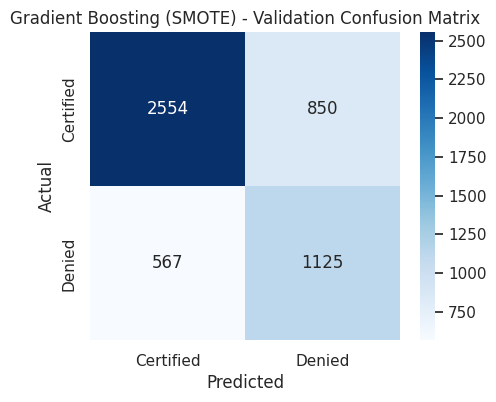

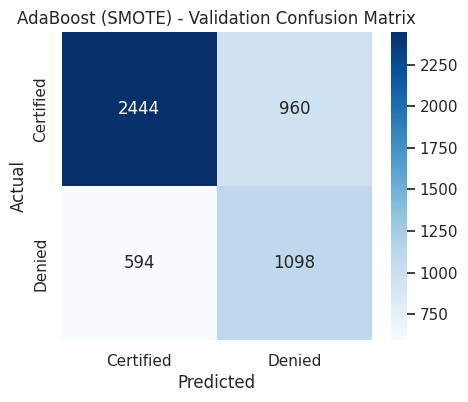

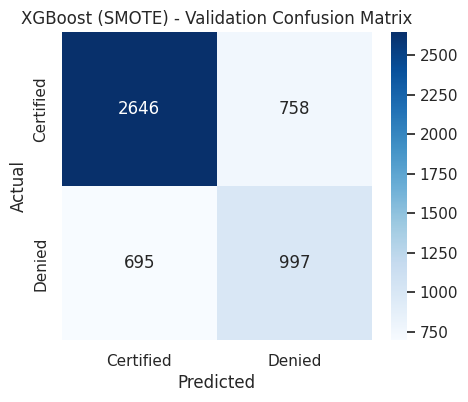

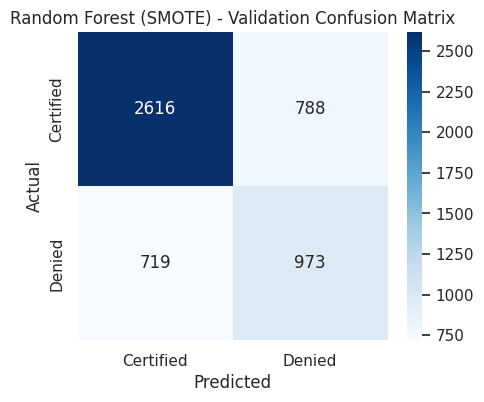

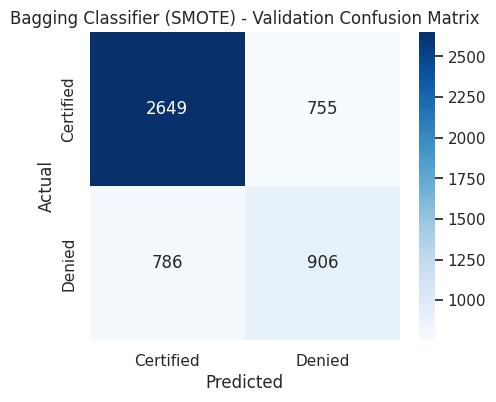

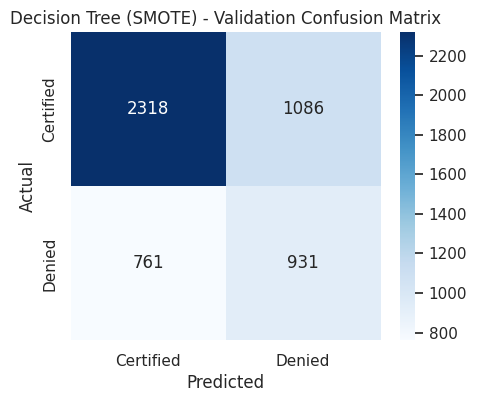

In [28]:
# ===============================================================================================================
# SECTION 6: MODEL BUILDING – OVERSAMPLED TRAIN DATA (SMOTE)
# ===============================================================================================================
# High-level overview for Section 6:
# - Apply SMOTE ONLY on training data
# - Verify class balance before and after SMOTE
# - Train the same 6 models on SMOTE data
# - Evaluate on original validation data
# - Compare metrics and confusion matrices

# Goal of this section:
# - The target variable `case_status` is imbalanced:
#     Certified ≈ 67%
#     Denied    ≈ 33%
#
# - Models trained on imbalanced data tend to favor the majority class ("Certified")
#   and may fail to correctly identify the minority class ("Denied").
#
# - To address this issue, we apply SMOTE (Synthetic Minority Oversampling Technique)
#   ONLY on the training data.
#
# What SMOTE does:
# - Generates synthetic samples for the minority class ("Denied")
# - Balances the training dataset WITHOUT duplicating existing rows
# - This is important because misclassifying "Denied" cases can lead to business risk.
#
# IMPORTANT (Data Leakage Prevention):
# - SMOTE is applied ONLY to the training data
# - Validation and test datasets remain unchanged
# - This ensures a fair and realistic evaluation of model performance
#
# Models trained in this section (same as baseline):
# - Decision Tree
# - Bagging Classifier
# - Random Forest
# - Gradient Boosting
# - AdaBoost
# - XGBoost
#
# Training data used:
# - X_train_smote, y_train_smote (balanced using SMOTE)
#
# Validation data used:
# - X_val_prep, y_val (original, unchanged)
#
# Evaluation approach:
# - Same metrics as Section 5 (Precision as primary metric)
# - Same helper functions for consistency and fair comparison
# ===============================================================================================================

# NOTE on SMOTE (important clarification):
#
# SMOTE does NOT duplicate existing minority class rows.
# Instead, it creates NEW synthetic data points for the minority class
# by interpolating between existing minority samples.
#
# Example:
# Suppose we have two "Denied" (minority) samples:
#   Sample 1: prevailing_wage = 50,000
#   Sample 2: prevailing_wage = 60,000
#
# SMOTE may create a NEW synthetic sample like:
#   Synthetic sample: prevailing_wage = 55,000
#
# This value (55,000) did NOT exist in the original dataset.
# It is a new, realistic point created between existing minority samples.
#
# This approach helps balance the training data without overfitting
# that can occur when simply duplicating rows.
#
# IMPORTANT:
# SMOTE is applied ONLY on the training data to avoid data leakage.
# ===============================================================================================================
# Why SMOTE is preferred over simple duplication:
#
# 1) Random Oversampling:
#    - Simply copies existing minority class rows.
#    - The model sees the same data repeatedly.
#    - This often leads to overfitting.
#
# 2) SMOTE (Synthetic Minority Oversampling Technique):
#    - Creates NEW synthetic minority class samples.
#    - New samples are generated between existing minority points.
#    - Reduces overfitting and improves generalization.
#    - Considered a safer and more robust approach.
#
# 3) Random Undersampling:
#    - Removes rows from the majority class.
#    - Can cause loss of important information.
#    - May reduce overall model performance.
#
# Conclusion:
# SMOTE provides a better balance between preserving information
# and improving minority class prediction.


# ============================================================
# Step 1: Apply SMOTE on Training Data ONLY
# ============================================================
from imblearn.over_sampling import SMOTE

# ------------------------------------------------------------
# BEFORE SMOTE: Training data summary
# ------------------------------------------------------------
print("Training data shape BEFORE SMOTE:")
print(X_train_prep.shape)

print("\nClass counts BEFORE SMOTE:")
print(y_train.value_counts())

print("\nClass proportions BEFORE SMOTE:")
print(y_train.value_counts(normalize=True))

# ------------------------------------------------------------
# Apply SMOTE (ONLY on training data)
# ------------------------------------------------------------
smote = SMOTE(random_state=42)

X_train_over_smote, y_train_over_smote = smote.fit_resample(
    X_train_prep,
    y_train
)

# ------------------------------------------------------------
# AFTER SMOTE: Training data summary
# ------------------------------------------------------------
print("\nTraining data shape AFTER SMOTE:")
print(X_train_over_smote.shape)

print("\nClass counts AFTER SMOTE:")
print(pd.Series(y_train_over_smote).value_counts())

print("\nClass proportions AFTER SMOTE:")
print(pd.Series(y_train_over_smote).value_counts(normalize=True))


# ============================================================
# Step 2: Train SKLEARN Models on SMOTE / Oversampled Data
# ============================================================
# - Train on oversampled training data
# - Validate on ORIGINAL validation data
# - Same models as baseline section

smote_results = []

smote_sklearn_models = [
    ("Decision Tree (SMOTE)", DecisionTreeClassifier(random_state=42)),
    ("Bagging Classifier (SMOTE)", BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    )),
    ("Random Forest (SMOTE)", RandomForestClassifier(
        n_estimators=100,
        random_state=42
    )),
    ("Gradient Boosting (SMOTE)", GradientBoostingClassifier(random_state=42)),
    ("AdaBoost (SMOTE)", AdaBoostClassifier(random_state=42)),
]

for name, model in smote_sklearn_models:
    result = model_performance_classification_sklearn(
        model,
        X_train_over_smote, y_train_over_smote,   # SMOTE training data
        X_val_prep, y_val,                        # original validation data
        model_name=name
    )
    smote_results.append(result)


# ============================================================
# Step 3: Train XGBoost on SMOTE Data
# ============================================================
# XGBoost requires numeric labels (0/1)
# (If label_map already exists in Section 5, reuse it)
label_map = {"Denied": 0, "Certified": 1}

y_train_over_smote_xgb = pd.Series(y_train_over_smote).map(label_map)

xgb_smote = XGBClassifier(
    random_state=42,
    eval_metric="logloss"
)

xgb_smote.fit(X_train_over_smote, y_train_over_smote_xgb)

# Predict
y_train_pred_xgb_smote = xgb_smote.predict(X_train_over_smote)
y_val_pred_xgb_smote   = xgb_smote.predict(X_val_prep)

# Convert predictions back to original labels
pred_map = {0: "Denied", 1: "Certified"}

y_train_pred_xgb_smote_lbl = pd.Series(y_train_pred_xgb_smote).map(pred_map)
y_val_pred_xgb_smote_lbl   = pd.Series(y_val_pred_xgb_smote, index=y_val.index).map(pred_map)


# ============================================================
# Step 4: Calculate XGBoost Metrics
# ============================================================
train_acc = accuracy_score(y_train_over_smote, y_train_pred_xgb_smote_lbl)
train_prec = precision_score(y_train_over_smote, y_train_pred_xgb_smote_lbl, pos_label="Certified")
train_rec = recall_score(y_train_over_smote, y_train_pred_xgb_smote_lbl, pos_label="Certified")
train_f1 = f1_score(y_train_over_smote, y_train_pred_xgb_smote_lbl, pos_label="Certified")

val_acc = accuracy_score(y_val, y_val_pred_xgb_smote_lbl)
val_prec = precision_score(y_val, y_val_pred_xgb_smote_lbl, pos_label="Certified")
val_rec = recall_score(y_val, y_val_pred_xgb_smote_lbl, pos_label="Certified")
val_f1 = f1_score(y_val, y_val_pred_xgb_smote_lbl, pos_label="Certified")

print("\nModel: XGBoost (SMOTE)")
print("Training Performance:")
print(f"Accuracy: {train_acc:.4f}, Precision: {train_prec:.4f}, Recall: {train_rec:.4f}, F1: {train_f1:.4f}")
print("Validation Performance:")
print(f"Accuracy: {val_acc:.4f}, Precision: {val_prec:.4f}, Recall: {val_rec:.4f}, F1: {val_f1:.4f}")

smote_results.append({
    "Model": "XGBoost (SMOTE)",
    "Train_Accuracy": train_acc,
    "Train_Precision": train_prec,
    "Train_Recall": train_rec,
    "Train_F1": train_f1,
    "Val_Accuracy": val_acc,
    "Val_Precision": val_prec,
    "Val_Recall": val_rec,
    "Val_F1": val_f1,
    "Trained_Model": xgb_smote
})


# ============================================================
# Step 5: Compare SMOTE Models (based on Validation Precision)
# ============================================================

# smote_results is a LIST of dictionaries
# Each dictionary represents ONE model and its metrics
#
# Example (simplified):
# smote_results = [
#   {"Model": "Gradient Boosting (SMOTE)", "Val_Precision": 0.78, ...},
#   {"Model": "Random Forest (SMOTE)",     "Val_Precision": 0.76, ...},
#   {"Model": "Decision Tree (SMOTE)",     "Val_Precision": 0.72, ...}
# ]

# ------------------------------------------------------------
# Step 5.1: Convert the list of model results into a DataFrame
# ------------------------------------------------------------
# This turns the list of dictionaries into a table-like structure
# where each row = one model
smote_results_df_sorted = (
    pd.DataFrame(smote_results)

    # --------------------------------------------------------
    # Step 5.2: Sort models by Validation Precision (descending)
    # --------------------------------------------------------
    # Why Validation Precision?
    # - Precision is our PRIMARY metric
    # - Higher precision means fewer False Positives for "Certified"
    #
    # After sorting:
    # - Row 0  → Best performing model
    # - Row 1  → Second best model
    # - Row 2  → Third best model
    .sort_values(by="Val_Precision", ascending=False)

    # --------------------------------------------------------
    # Step 5.3: Reset the index for clean presentation
    # --------------------------------------------------------
    # Without reset_index(), the row numbers would look confusing
    # (e.g., 3, 1, 0, 2 after sorting)
    #
    # reset_index(drop=True) makes the table clean:
    # 0, 1, 2, 3 ...
    .reset_index(drop=True)
)

# ------------------------------------------------------------
# Step 5.4: Display only the most important columns
# ------------------------------------------------------------
# - Train metrics help us detect overfitting
# - Validation metrics are used to select the best model
display(smote_results_df_sorted[[
    "Model",
    "Train_Precision", "Train_Recall", "Train_F1",
    "Val_Precision", "Val_Recall", "Val_F1"
]])



# ============================================================
# Step 6: Confusion Matrices (Validation Data)
# ============================================================
for row in smote_results_df_sorted.itertuples():
    model_name = row.Model
    trained_model = row.Trained_Model

    if "XGBoost" in model_name:
        confusion_matrix_xgb_sklearn(
            trained_model,
            X_val_prep,
            y_val,
            title=f"{model_name} - Validation Confusion Matrix"
        )
    else:
        confusion_matrix_sklearn(
            trained_model,
            X_val_prep,
            y_val,
            title=f"{model_name} - Validation Confusion Matrix"
        )



## **Observations – Section 6: Model Performance with SMOTE (Oversampled Training Data)**

1. **Class imbalance was successfully handled using SMOTE**

    - Before SMOTE, the training data was imbalanced (≈67% Certified, ≈33% Denied).

    - After SMOTE, both classes became perfectly balanced (50% Certified, 50% Denied).

    - This confirms that SMOTE worked as expected and did not affect validation data.

2. **Decision Tree (SMOTE) shows severe overfitting**

    - Training performance is perfect (Precision = 1.00, Recall = 1.00).

    - Validation performance drops significantly (Precision ≈ 0.75, Recall ≈ 0.68).

    - This means the model memorized the SMOTE-generated training data but did not generalize well to unseen validation data.

    - SMOTE increased the overfitting problem for Decision Tree.

3. **Random Forest (SMOTE) still overfits despite ensemble learning**

    - Training metrics are perfect (Precision = 1.00, Recall = 1.00).

    - Validation precision (~0.78) is lower and similar to baseline.

    - Random Forest has high model capacity (many trees + deep splits), so with SMOTE it can fit synthetic data too closely, reducing generalization.

4. **Bagging Classifier (SMOTE) shows limited improvement**

   - Training performance is very high, but validation precision (~0.77) does not improve much.

   - Confusion matrix still shows a high number of False Positives.

   - SMOTE does not significantly benefit Bagging in this case.

5. **AdaBoost (SMOTE) improves balance but not the best performer**

   - Validation precision improves (~0.80) compared to baseline.

   - Recall for Denied class improves, meaning fewer Denied cases are missed.

   - However, overall performance is still below Gradient Boosting.

6. **Gradient Boosting (SMOTE) is the best SMOTE-based model**

   - Highest validation precision (~0.82) among SMOTE models.

   - Good balance between Precision and Recall.

   - Confusion matrix shows fewer False Positives compared to other SMOTE models.

   - This model benefits from SMOTE without overfitting.

7. **XGBoost (SMOTE) performs well but not better than Gradient Boosting**

    - Validation precision (~0.79) is stable but slightly lower than Gradient Boosting.

    - Recall improves compared to baseline, indicating better minority class detection.

    - SMOTE helps XGBoost, but gains are moderate.

8. **Overall impact of SMOTE**

    - SMOTE improves Recall and F1-score for several models, especially for the minority class (Denied).

    - However, SMOTE can increase overfitting for high-capacity models like Decision Tree and Random Forest.

    - Gradient Boosting shows the best trade-off between learning from SMOTE data and generalizing to unseen data.

9. **Best model in Section 6 (SMOTE)**

   - Gradient Boosting (SMOTE) is the top performer based on Validation Precision and balanced confusion matrix.

   - It outperforms other SMOTE models while avoiding severe overfitting.

Training data shape BEFORE undersampling:
(15288, 28)

Class counts BEFORE undersampling:
case_status
Certified    10210
Denied        5078
Name: count, dtype: int64

Class proportions BEFORE undersampling:
case_status
Certified    0.667844
Denied       0.332156
Name: proportion, dtype: float64

Training data shape AFTER undersampling:
(10156, 28)

Class counts AFTER undersampling:
case_status
Certified    5078
Denied       5078
Name: count, dtype: int64

Class proportions AFTER undersampling:
case_status
Certified    0.5
Denied       0.5
Name: proportion, dtype: float64

Model: Decision Tree (Under)
Training Performance:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Validation Performance:
Accuracy: 0.6313, Precision: 0.7716, Recall: 0.6363, F1: 0.6975

Model: Bagging Classifier (Under)
Training Performance:
Accuracy: 0.9793, Precision: 0.9702, Recall: 0.9890, F1: 0.9795
Validation Performance:
Accuracy: 0.6829, Precision: 0.7888, Recall: 0.7174, F1: 0.7514

Model: R

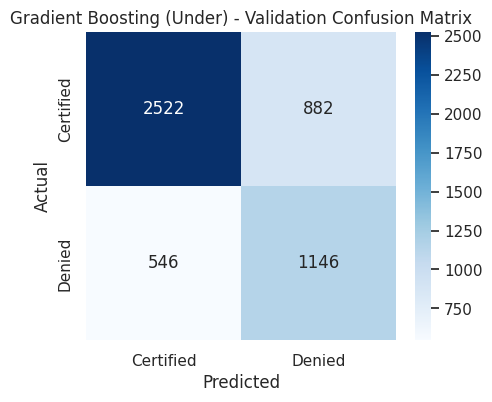

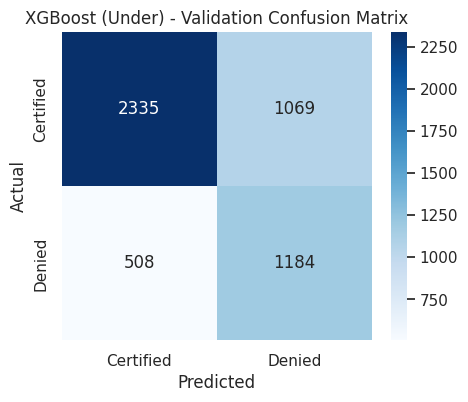

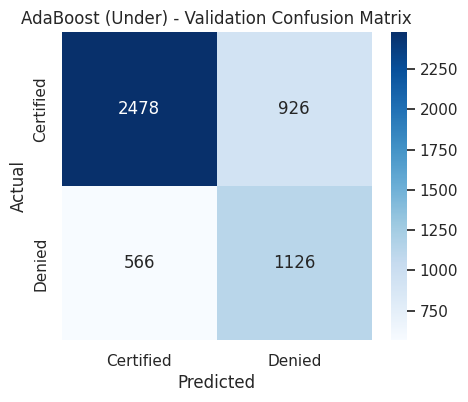

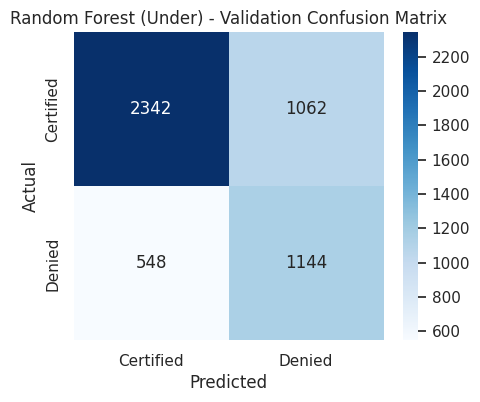

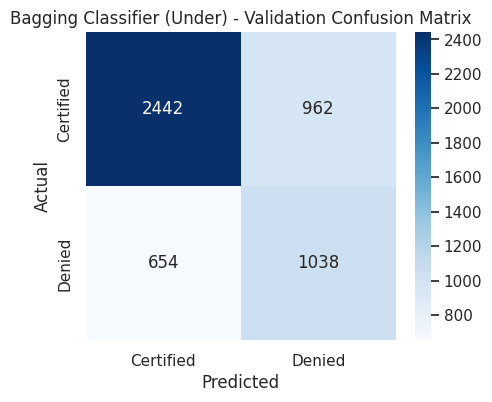

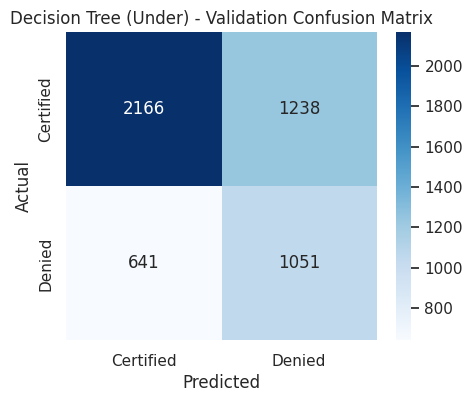

In [29]:
# ============================================================
# SECTION 7: MODEL BUILDING - UNDERSAMPLED DATA (RandomUnderSampler)
# ============================================================
# Undersampling reduces the size of the training data by removing
# many majority-class ("Certified") rows.
#
# This may hurt model performance because some removed rows can
# contain important patterns or edge cases.
# Once those rows are removed, the model never learns from them,
# which can reduce its ability to generalize on unseen validation data.

# SECTION 7: High-Level overview
# - Apply random undersampling ONLY on training data
# - Train the same 6 models on undersampled data
# - Evaluate on original validation data
# - Compare performance trade-offs (precision vs recall)

# Goal of this section:
# - Address class imbalance by REDUCING the majority class (Certified)
# - No synthetic data is created
# - Training data becomes smaller but perfectly balanced
# - Validation data remains ORIGINAL and unchanged
#
# IMPORTANT:
# - Undersampling is applied ONLY on training data
# - Validation and test data are NOT modified
# ============================================================


# ============================================================
# Step 1: Apply RandomUnderSampler on Training Data ONLY
# ============================================================
from imblearn.under_sampling import RandomUnderSampler

# ------------------------------------------------------------
# BEFORE undersampling: Training data summary
# ------------------------------------------------------------
print("Training data shape BEFORE undersampling:")
print(X_train_prep.shape)

print("\nClass counts BEFORE undersampling:")
print(y_train.value_counts())

print("\nClass proportions BEFORE undersampling:")
print(y_train.value_counts(normalize=True))


# ------------------------------------------------------------
# Apply RandomUnderSampler
# ------------------------------------------------------------
rus = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = rus.fit_resample(
    X_train_prep,
    y_train
)


# ------------------------------------------------------------
# AFTER undersampling: Training data summary
# ------------------------------------------------------------
print("\nTraining data shape AFTER undersampling:")
print(X_train_under.shape)

print("\nClass counts AFTER undersampling:")
print(pd.Series(y_train_under).value_counts())

print("\nClass proportions AFTER undersampling:")
print(pd.Series(y_train_under).value_counts(normalize=True))


# ============================================================
# Step 2: Train SKLEARN Models on Undersampled Data
# ============================================================
# - Train on undersampled training data
# - Validate on ORIGINAL validation data
# - Same models as baseline & SMOTE sections

under_results = []

under_sklearn_models = [
    ("Decision Tree (Under)", DecisionTreeClassifier(random_state=42)),

    ("Bagging Classifier (Under)", BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    )),

    ("Random Forest (Under)", RandomForestClassifier(
        n_estimators=100,
        random_state=42
    )),

    ("Gradient Boosting (Under)", GradientBoostingClassifier(random_state=42)),

    ("AdaBoost (Under)", AdaBoostClassifier(random_state=42)),
]

# Train and evaluate sklearn models
for name, model in under_sklearn_models:
    result = model_performance_classification_sklearn(
        model,
        X_train_under, y_train_under,   # undersampled training data
        X_val_prep, y_val,              # original validation data
        model_name=name
    )
    under_results.append(result)


# ============================================================
# Step 3: Train XGBoost on Undersampled Data
# ============================================================
# XGBoost requires numeric class labels (0/1)

label_map = {"Denied": 0, "Certified": 1}

y_train_under_xgb = pd.Series(y_train_under).map(label_map)

xgb_under = XGBClassifier(
    random_state=42,
    eval_metric="logloss"
)

# Train XGBoost on undersampled training data
xgb_under.fit(X_train_under, y_train_under_xgb)

# Predict
y_train_pred_xgb_under = xgb_under.predict(X_train_under)
y_val_pred_xgb_under = xgb_under.predict(X_val_prep)

# Convert predictions back to original labels
pred_map = {0: "Denied", 1: "Certified"}

y_train_pred_xgb_under_lbl = pd.Series(y_train_pred_xgb_under).map(pred_map)
y_val_pred_xgb_under_lbl = pd.Series(
    y_val_pred_xgb_under, index=y_val.index
).map(pred_map)


# ============================================================
# Step 4: Calculate XGBoost Metrics
# ============================================================
train_acc = accuracy_score(y_train_under, y_train_pred_xgb_under_lbl)
train_prec = precision_score(y_train_under, y_train_pred_xgb_under_lbl, pos_label="Certified")
train_rec = recall_score(y_train_under, y_train_pred_xgb_under_lbl, pos_label="Certified")
train_f1 = f1_score(y_train_under, y_train_pred_xgb_under_lbl, pos_label="Certified")

val_acc = accuracy_score(y_val, y_val_pred_xgb_under_lbl)
val_prec = precision_score(y_val, y_val_pred_xgb_under_lbl, pos_label="Certified")
val_rec = recall_score(y_val, y_val_pred_xgb_under_lbl, pos_label="Certified")
val_f1 = f1_score(y_val, y_val_pred_xgb_under_lbl, pos_label="Certified")

print("\nModel: XGBoost (Under)")
print("Training Performance:")
print(f"Accuracy: {train_acc:.4f}, Precision: {train_prec:.4f}, Recall: {train_rec:.4f}, F1: {train_f1:.4f}")
print("Validation Performance:")
print(f"Accuracy: {val_acc:.4f}, Precision: {val_prec:.4f}, Recall: {val_rec:.4f}, F1: {val_f1:.4f}")

under_results.append({
    "Model": "XGBoost (Under)",
    "Train_Accuracy": train_acc,
    "Train_Precision": train_prec,
    "Train_Recall": train_rec,
    "Train_F1": train_f1,
    "Val_Accuracy": val_acc,
    "Val_Precision": val_prec,
    "Val_Recall": val_rec,
    "Val_F1": val_f1,
    "Trained_Model": xgb_under
})


# ============================================================
# Step 5: Compare Undersampled Models (Validation Precision)
# ============================================================

# ------------------------------------------------------------
# Why do we reset the index after sorting?
#
# Example BEFORE reset_index:
#
# Index  Model                          Val_Precision
# 4      Gradient Boosting (Under)       0.79
# 1      Random Forest (Under)           0.77
# 0      Decision Tree (Under)           0.74
#
# The index values (4, 1, 0) come from the original DataFrame
# and look confusing after sorting.
#
# Example AFTER reset_index(drop=True):
#
# Index  Model                          Val_Precision
# 0      Gradient Boosting (Under)       0.79   <-- BEST model
# 1      Random Forest (Under)           0.77
# 2      Decision Tree (Under)           0.74
#
# Resetting the index makes the ranking clear and readable:
# - Row 0 = best model
# - Row 1 = second best
# - Row 2 = third best
# ------------------------------------------------------------


under_results_df_sorted = (
    pd.DataFrame(under_results)

    # Step 1: Sort models by Validation Precision (highest first)
    # Validation Precision is our PRIMARY metric
    .sort_values(by="Val_Precision", ascending=False)

    # Step 2: Reset index AFTER sorting
    # This makes the table easy to read:
    # Row 0 -> Best model
    # Row 1 -> Second best model
    # Row 2 -> Third best model
    .reset_index(drop=True)
)

# Step 3: Display only important metrics for comparison
under_results_df_sorted[[
    "Model",
    "Train_Precision", "Train_Recall", "Train_F1",
    "Val_Precision", "Val_Recall", "Val_F1"
]]



# ============================================================
# Step 6: Confusion Matrices (Validation Data)
# ============================================================
for row in under_results_df_sorted.itertuples():
    model_name = row.Model
    trained_model = row.Trained_Model

    if "XGBoost" in model_name:
        confusion_matrix_xgb_sklearn(
            trained_model,
            X_val_prep,
            y_val,
            title=f"{model_name} - Validation Confusion Matrix"
        )
    else:
        confusion_matrix_sklearn(
            trained_model,
            X_val_prep,
            y_val,
            title=f"{model_name} - Validation Confusion Matrix"
        )



## **Section 7 – Observations: Undersampled Training Data (RandomUnderSampler)**

1. **Undersampling successfully balanced the training data**

   - Before undersampling, the training data was imbalanced (≈67% Certified, ≈33% Denied).

   - After undersampling, both classes became perfectly balanced (50% Certified, 50% Denied).

   - However, this balance was achieved by removing many Certified (majority) records, reducing the total training size from 15,288 to 10,156 rows.

2. **Decision Tree severely overfits after undersampling**

   - The Decision Tree achieved perfect training performance (100% for all metrics).

   - On validation data, performance dropped sharply (Precision ≈ 0.77, Recall ≈ 0.64).

   - This shows the model memorized the smaller undersampled training set but failed to generalize to unseen data, a classic overfitting issue caused by aggressive data removal.

3. **Ensemble models handled undersampling better than single trees**

    - Bagging, Random Forest, Gradient Boosting, AdaBoost, and XGBoost showed much more stable validation performance compared to a single Decision Tree.

    - This is because ensemble models average decisions across multiple learners, reducing sensitivity to lost data.

4. **Gradient Boosting (Under) performed the best overall**

   - It achieved the highest Validation Precision (~0.82) among all undersampled models.

   - The confusion matrix shows a better balance between False Positives and False Negatives, making it the most reliable model in this section.

   - This suggests Gradient Boosting can still learn meaningful patterns even when the training data size is reduced.

5. **Random Forest and XGBoost showed moderate performance loss**

   - Both models achieved strong training performance but experienced some drop in validation recall and F1-score.

   - This indicates that removing majority-class samples caused loss of useful information needed for generalization.

6. **Undersampling improves minority detection but at a cost**

   - Compared to the baseline (Section 5), undersampling improves balance between Certified and Denied predictions.

   - However, removing real data reduces the model’s exposure to real-world patterns, which can hurt overall performance.

7. **Overall conclusion for undersampling**

   - Undersampling is simple and avoids synthetic data, but it throws away valuable information.

   - In this experiment, undersampling performed worse than SMOTE (Section 6) and only slightly better than some baseline models.

   - Among undersampled models, Gradient Boosting (Under) is the strongest candidate, but undersampling is not the preferred strategy overall.

# **Model Performance Improvement**

## **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```


In [31]:

# =====================================================================
# SECTION 8 (Explained): Pick Top 3 Models + Hyperparameter Tuning
# Using RandomizedSearchCV (NOT GridSearchCV)
# ======================================================================
# SECTION 8: High-Level overview
# What this section does (high-level):
# 1) Combine results of ALL 18 models (Original + SMOTE + Under)
# 2) Pick TOP 3 models based on Validation Precision
# 3) For each of the TOP 3:
#    - Try many parameter combinations using RandomizedSearchCV
#    - Find BEST parameter values (best_params_)
#    - Get the BEST tuned model (best_estimator_)
#    - Evaluate tuned model on Train + Validation
#    - Save tuned models and metrics for final comparison
#
# Assumption:
# You already have these 3 result DataFrames from earlier sections:
# 1) baseline_results_df_sorted  (Original)
# 2) smote_results_df_sorted     (SMOTE)
# 3) under_results_df_sorted     (Under)
#
# And you already have the correct datasets:
# Original:
#   X_train_prep, y_train, X_val_prep, y_val
# SMOTE:
#   X_train_over_smote, y_train_over_smote, X_val_prep, y_val
# Under:
#   X_train_under, y_train_under, X_val_prep, y_val
#
# =====================================================================

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, precision_score

# ------------------------------------------------------------
# IMPORTANT FIX (WHY I am changing the code here)
# ------------------------------------------------------------
# Earlier, I was using:
#     base_model = row["Trained_Model"]
# That object is already trained/fitted in previous sections.
#
# RandomizedSearchCV expects a *fresh, unfitted* estimator.
# It will internally clone the estimator and fit it many times.
#
# So we will create a new/fresh model object for each family
# (Decision Tree, Random Forest, Gradient Boosting, etc.)
# ------------------------------------------------------------

def build_fresh_model(family_name):
    """
    Create a fresh (unfitted) model object based on the model family.
    This avoids reusing already-fitted models from earlier sections.
    """
    # Note: random_state is kept the same for reproducibility

    if family_name == "Decision Tree":
        return DecisionTreeClassifier(random_state=42)

    if family_name == "Bagging Classifier":
        # Bagging wraps a Decision Tree inside it
        return BaggingClassifier(
            estimator=DecisionTreeClassifier(random_state=42),
            random_state=42
        )

    if family_name == "Random Forest":
        return RandomForestClassifier(random_state=42)

    if family_name == "Gradient Boosting":
        return GradientBoostingClassifier(random_state=42)

    if family_name == "AdaBoost":
        return AdaBoostClassifier(random_state=42)

    if family_name == "XGBoost":
        return XGBClassifier(random_state=42, eval_metric="logloss")

    # If model name is not one of the expected ones, stop early
    raise ValueError(f"Unknown model family: {family_name}")


# ------------------------------------------------------------
# Step 8A) Combine all 18 results into one table
# ------------------------------------------------------------
# We add a "Data_Version" column so later we know:
# - Original model trained on original training data
# - SMOTE model trained on SMOTE oversampled training data
# - Under model trained on undersampled training data

baseline_results_df_sorted = baseline_results_df_sorted.copy()
baseline_results_df_sorted["Data_Version"] = "Original"

smote_results_df_sorted = smote_results_df_sorted.copy()
smote_results_df_sorted["Data_Version"] = "SMOTE"

under_results_df_sorted = under_results_df_sorted.copy()
under_results_df_sorted["Data_Version"] = "Under"

# Stack all 3 dataframes into ONE dataframe = 18 rows (18 models)
all_results = pd.concat(
    [baseline_results_df_sorted, smote_results_df_sorted, under_results_df_sorted],
    ignore_index=True
)

# Sort all models by Validation Precision (main metric we care about)
# Reset index to make it clean: 0,1,2,... so best model is at row 0
all_results_sorted = (
    all_results
    .sort_values(by="Val_Precision", ascending=False)
    .reset_index(drop=True)
)

# Show the 18 models ranked by Validation Precision
display_cols = [
    "Data_Version", "Model",
    "Train_Precision", "Train_Recall", "Train_F1",
    "Val_Precision", "Val_Recall", "Val_F1"
]
print("\nTop models (sorted by Val Precision)")
display(all_results_sorted[display_cols])


# ------------------------------------------------------------
# Step 8B) Pick the TOP 3 models (before tuning)
# ------------------------------------------------------------
# We pick the first 3 rows from the sorted table.
# These are the best baseline performers across all data versions.
top3 = all_results_sorted.head(3).copy()

print("\nTop 3 Models Selected for Tuning")
display(top3[display_cols])


# ------------------------------------------------------------
# Step 8C) Define precision scorers
# ------------------------------------------------------------
# Why we need scorers:
# RandomizedSearchCV needs a "scoring" function to decide what is BEST.
# We want BEST = highest precision.

# For sklearn models, y labels are strings ("Certified", "Denied")
precision_certified = make_scorer(precision_score, pos_label="Certified")

# For XGBoost, y labels MUST be numeric (0/1), so we use pos_label=1
precision_one = make_scorer(precision_score, pos_label=1)


# --------------------------------------------------------------------
# Step 8D) Parameter grids for tuning (given in the project)
# --------------------------------------------------------------------
# Each model has its own tuning parameters.
# RandomizedSearchCV will randomly pick combinations from these grids.
#
# --------------------------------------------------------------------
# NOTE:
# I intentionally do NOT tune the "init" parameter for Gradient Boosting.
#
# Why:
# - The "init" parameter controls the INITIAL model used before boosting starts.
# - Gradient Boosting is designed to start from a simple baseline
#   (usually a constant prediction).
#
# For this project:
# - Our goal is to compare models fairly and focus on improving validation precision.
# - Tuning "init" would introduce an extra model inside the pipeline,
#   making results harder to interpret and compare.
# - It adds complexity without a clear benefit for our primary metric.
#
# Therefore, I tuned only the most impactful and commonly used
# Gradient Boosting hyperparameters:
# - n_estimators   : number of boosting trees
# - learning_rate : how fast the model learns
# - subsample     : fraction of data each tree sees
# - max_features  : number of features considered per split
# ------------------------------------------------------------------------
param_grids = {
    "Decision Tree": {
        "max_depth": np.arange(2, 6),
        "min_samples_leaf": [1, 4, 7],
        "max_leaf_nodes": [10, 15],
        "min_impurity_decrease": [0.0001, 0.001]
    },

    "Bagging Classifier": {
        "max_samples": [0.8, 0.9, 1.0],
        "max_features": [0.7, 0.8, 0.9],
        "n_estimators": [30, 50, 70]
    },

    "Random Forest": {
        "n_estimators": np.arange(50, 111, 25),
        "min_samples_leaf": np.arange(1, 4),
        "max_features": ["sqrt", 0.3, 0.4, 0.5],
        "max_samples": [0.4, 0.5, 0.6]
    },

    "Gradient Boosting": {
        "n_estimators": np.arange(50, 111, 25),
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.7, 0.9],
        "max_features": [0.5, 0.7, 1.0]
    },

    "AdaBoost": {
        "n_estimators": np.arange(50, 111, 25),
        "learning_rate": [0.01, 0.05, 0.1],
        # estimator is the base model used inside AdaBoost
        "estimator": [
            DecisionTreeClassifier(max_depth=2, random_state=1),
            DecisionTreeClassifier(max_depth=3, random_state=1),
        ]
    },

    "XGBoost": {
        "n_estimators": np.arange(50, 111, 25),
        "scale_pos_weight": [1, 2, 5],
        "learning_rate": [0.01, 0.05, 0.1],
        "gamma": [1, 3],
        "subsample": [0.7, 0.9]
    }
}


# ------------------------------------------------------------
# Step 8E) Helper function: choose correct dataset
# ------------------------------------------------------------
# Why this function:
# The top 3 models can come from different data versions.
# Example:
# - A model might be "Under" --> must train on undersampled training set
# - A model might be "SMOTE" --> must train on SMOTE training set
# - A model might be "Original" --> must train on original training set
def get_data_by_version(data_version):
    if data_version == "Original":
        return X_train_prep, y_train, X_val_prep, y_val

    if data_version == "SMOTE":
        return X_train_over_smote, y_train_over_smote, X_val_prep, y_val

    if data_version == "Under":
        return X_train_under, y_train_under, X_val_prep, y_val

    # If something unexpected is found, stop and show error
    raise ValueError("Unknown Data_Version found!")


# ------------------------------------------------------------
# Step 8F) Tune the TOP 3 models using RandomizedSearchCV
# ------------------------------------------------------------
tuned_results = []

for i, row in top3.iterrows():
    # Example model_name_full: "Gradient Boosting (Under)"
    model_name_full = row["Model"]

    # Which data version this model came from: Original / SMOTE / Under
    data_version = row["Data_Version"]

    print("\n" + "="*70)
    print(f"TUNING MODEL {i+1}/3: {model_name_full}  |  Data: {data_version}")
    print("="*70)

    # ---------------------------------------------
    # Step 8F-1) Identify the model family name
    # ---------------------------------------------
    # Example:
    # "Gradient Boosting (Under)" -> "Gradient Boosting"
    # "Random Forest (SMOTE)"     -> "Random Forest"
    family_name = model_name_full.split(" (")[0].strip()

    # Get correct train/val data depending on Original/SMOTE/Under
    X_tr, y_tr, X_v, y_v = get_data_by_version(data_version)

    # ---------------------------------------------
    # Step 8F-2) Create a FRESH model (unfitted)
    # ---------------------------------------------
    # This is the key fix:
    # - Do NOT reuse row["Trained_Model"]
    # - Always create a fresh estimator for RandomizedSearchCV
    base_model = build_fresh_model(family_name)

    # --------------------------------------------------------
    # Step 8F-3) SPECIAL HANDLING FOR XGBOOST VS SKLEARN MODELS
    # ---------------------------------------------------------
    # Why do we need this?
    #
    # - Most sklearn models can work directly with STRING labels:
    #       "Certified" (positive class)
    #       "Denied"    (negative class)
    #
    # - XGBoost cannot use string labels.
    #   It requires NUMERIC labels:
    #       1 -> Certified
    #       0 -> Denied
    #
    # So:
    # - sklearn models:
    #     y stays as strings, scoring uses pos_label="Certified"
    # - XGBoost:
    #     convert y to 0/1, scoring uses pos_label=1
    if family_name == "XGBoost":
        label_map = {"Denied": 0, "Certified": 1}
        y_tr_used = y_tr.map(label_map)     # numeric labels for XGBoost training
        scorer = precision_one              # precision for class 1 (Certified)
    else:
        y_tr_used = y_tr                    # string labels for sklearn models
        scorer = precision_certified        # precision for "Certified"

    # ---------------------------------------------
    # Step 8F-4) Select the correct parameter grid
    # ---------------------------------------------
    grid = param_grids.get(family_name, None)
    if grid is None:
        print(f"No param grid found for {family_name}. Skipping tuning.")
        continue

    # ---------------------------------------------
    # Step 8F-5) RandomizedSearchCV (Hyperparameter tuning)
    # ---------------------------------------------
    # What happens here:
    # - Randomly tries n_iter parameter combinations from grid
    # - For each combination, runs cross-validation (cv=5)
    # - Picks the best combination using the scoring metric (precision)
    rs = RandomizedSearchCV(
        estimator=base_model,        # fresh model object (unfitted)
        param_distributions=grid,    # hyperparameters to try
        n_iter=15,                   # number of random combos tried
        scoring=scorer,              # choose best based on precision
        cv=5,                        # 5-fold cross validation
        random_state=42,
        n_jobs=-1
    )

    # This line RUNS the search (fits many models internally)
    rs.fit(X_tr, y_tr_used)

    # Best CV score and best params found
    print("\nBest CV Precision Score:", round(rs.best_score_, 4))
    print("Best Parameters:")
    print(rs.best_params_)

    # ---------------------------------------------
    # Step 8F-6) Get tuned model (best_estimator_)
    # ---------------------------------------------
    # best_estimator_ is the model trained with the best hyperparameters
    best_model = rs.best_estimator_

    # -----------------------------------------------------
    # Step 8F-7) Evaluate tuned model on Train + Validation
    # -----------------------------------------------------
    # Goal:
    # - Get tuned model predictions
    # - Compute metrics (Precision, Recall, F1) on Train and Validation
    #
    # NOTE:
    # - For XGBoost predictions are numeric (0/1) → convert back to strings
    # - For sklearn models predictions are already strings
    if family_name == "XGBoost":
        pred_map = {0: "Denied", 1: "Certified"}

        # Predict numeric labels
        y_tr_pred_num = best_model.predict(X_tr)
        y_v_pred_num  = best_model.predict(X_v)

        # Convert numeric predictions back to string labels
        # We convert back to strings because:
        # - our metrics use pos_label="Certified"
        # - our confusion matrix plots use labels=["Certified", "Denied"]
        # This keeps reporting consistent across all models.
        y_tr_pred_lbl = pd.Series(y_tr_pred_num, index=y_tr.index).map(pred_map)
        y_v_pred_lbl  = pd.Series(y_v_pred_num,  index=y_v.index).map(pred_map)

        # Metrics compare against original string y (consistent everywhere)
        y_tr_for_metrics = y_tr
        y_v_for_metrics  = y_v

    else:
        # Sklearn models predict strings directly
        y_tr_pred_lbl = best_model.predict(X_tr)
        y_v_pred_lbl  = best_model.predict(X_v)

        y_tr_for_metrics = y_tr
        y_v_for_metrics  = y_v

    # Calculate metrics for Train and Validation
    train_acc = accuracy_score(y_tr_for_metrics, y_tr_pred_lbl)
    train_prec = precision_score(y_tr_for_metrics, y_tr_pred_lbl, pos_label="Certified")
    train_rec = recall_score(y_tr_for_metrics, y_tr_pred_lbl, pos_label="Certified")
    train_f1 = f1_score(y_tr_for_metrics, y_tr_pred_lbl, pos_label="Certified")

    val_acc = accuracy_score(y_v_for_metrics, y_v_pred_lbl)
    val_prec = precision_score(y_v_for_metrics, y_v_pred_lbl, pos_label="Certified")
    val_rec = recall_score(y_v_for_metrics, y_v_pred_lbl, pos_label="Certified")
    val_f1 = f1_score(y_v_for_metrics, y_v_pred_lbl, pos_label="Certified")

    # Print tuned model performance
    print("\nTUNED MODEL PERFORMANCE")
    print("Train  ->", f"Acc:{train_acc:.4f}  Prec:{train_prec:.4f}  Rec:{train_rec:.4f}  F1:{train_f1:.4f}")
    print("Val    ->", f"Acc:{val_acc:.4f}  Prec:{val_prec:.4f}  Rec:{val_rec:.4f}  F1:{val_f1:.4f}")

    # Store tuned results so Section 9 can compare tuned top 3 models in a table
    tuned_results.append({
        "Data_Version": data_version,
        "Model": model_name_full + " (Tuned)",
        "Best_CV_Precision": rs.best_score_,   # best CV precision from tuning step
        "Best_Params": rs.best_params_,        # best parameter values found
        "Train_Precision": train_prec,
        "Train_Recall": train_rec,
        "Train_F1": train_f1,
        "Val_Precision": val_prec,
        "Val_Recall": val_rec,
        "Val_F1": val_f1,
        "Tuned_Model": best_model              # tuned model object
    })

# Save tuned results for Section 9
tuned_results_df = pd.DataFrame(tuned_results)

# Optional: display tuned results table
# (This helps quickly compare tuned top 3 models on validation metrics)
display_cols_tuned = [
    "Data_Version", "Model",
    "Best_CV_Precision",
    "Train_Precision", "Train_Recall", "Train_F1",
    "Val_Precision", "Val_Recall", "Val_F1"
]
print("\nTuned Results (Top 3 models after RandomizedSearchCV)")
display(tuned_results_df[display_cols_tuned])





Top models (sorted by Val Precision)


,Data_Version,Model,Train_Precision,Train_Recall,Train_F1,Val_Precision,Val_Recall,Val_F1
0,Under,Gradient Boosting (Under),0.709431,0.768807,0.737926,0.822034,0.740893,0.779357
1,Under,XGBoost (Under),0.866394,0.877314,0.871820,0.821316,0.685958,0.747559
2,SMOTE,Gradient Boosting (SMOTE),0.741489,0.755142,0.748253,0.818327,0.750294,0.782835
3,Under,AdaBoost (Under),0.686472,0.739464,0.711983,0.814060,0.727967,0.768610
4,Under,Random Forest (Under),1.000000,1.000000,1.000000,0.810381,0.688014,0.744201
5,SMOTE,AdaBoost (SMOTE),0.693100,0.712243,0.702541,0.804477,0.717979,0.758771
6,SMOTE,XGBoost (SMOTE),0.842748,0.865034,0.853746,0.791978,0.777321,0.784581
7,Under,Bagging Classifier (Under),0.970247,0.988972,0.979520,0.788760,0.717391,0.751385
8,SMOTE,Random Forest (SMOTE),1.000000,1.000000,1.000000,0.784408,0.768508,0.776376
9,Original,Gradient Boosting,0.782454,0.881391,0.828981,0.777749,0.883079,0.827074



Top 3 Models Selected for Tuning


,Data_Version,Model,Train_Precision,Train_Recall,Train_F1,Val_Precision,Val_Recall,Val_F1
0,Under,Gradient Boosting (Under),0.709431,0.768807,0.737926,0.822034,0.740893,0.779357
1,Under,XGBoost (Under),0.866394,0.877314,0.871820,0.821316,0.685958,0.747559
2,SMOTE,Gradient Boosting (SMOTE),0.741489,0.755142,0.748253,0.818327,0.750294,0.782835



TUNING MODEL 1/3: Gradient Boosting (Under)  |  Data: Under

Best CV Precision Score: 0.7027
Best Parameters:
{'subsample': 0.9, 'n_estimators': np.int64(50), 'max_features': 1.0, 'learning_rate': 0.01}

TUNED MODEL PERFORMANCE
Train  -> Acc:0.6955  Prec:0.7037  Rec:0.6757  F1:0.6894
Val    -> Acc:0.6803  Prec:0.8233  Rec:0.6639  F1:0.7351

TUNING MODEL 2/3: XGBoost (Under)  |  Data: Under

Best CV Precision Score: 0.6962
Best Parameters:
{'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': np.int64(100), 'learning_rate': 0.05, 'gamma': 1}

TUNED MODEL PERFORMANCE
Train  -> Acc:0.7509  Prec:0.7361  Rec:0.7822  F1:0.7584
Val    -> Acc:0.7135  Prec:0.8225  Rec:0.7283  F1:0.7725

TUNING MODEL 3/3: Gradient Boosting (SMOTE)  |  Data: SMOTE

Best CV Precision Score: 0.733
Best Parameters:
{'subsample': 0.7, 'n_estimators': np.int64(100), 'max_features': 1.0, 'learning_rate': 0.1}

TUNED MODEL PERFORMANCE
Train  -> Acc:0.7488  Prec:0.7451  Rec:0.7565  F1:0.7507
Val    -> Acc:0.7202  Pr

,Data_Version,Model,Best_CV_Precision,Train_Precision,Train_Recall,Train_F1,Val_Precision,Val_Recall,Val_F1
0,Under,Gradient Boosting (Under) (Tuned),0.702728,0.703651,0.675660,0.689371,0.823315,0.663925,0.735079
1,Under,XGBoost (Under) (Tuned),0.696227,0.736101,0.782198,0.758449,0.822495,0.728261,0.772515
2,SMOTE,Gradient Boosting (SMOTE) (Tuned),0.732961,0.745056,0.756513,0.750741,0.816987,0.748825,0.781422


### **Section 8 – Model Selection & Hyperparameter Tuning (Observations)**

1. A total of **18 models** were compared in this section:
   - 6 trained on **Original data**
   - 6 trained on **SMOTE oversampled data**
   - 6 trained on **Undersampled data**

2. All models were ranked using **Validation Precision**, since precision is the primary business metric
   (reducing false positives for the “Certified” class).

3. Based on Validation Precision, the **Top 3 models selected for hyperparameter tuning** were:
   - **Gradient Boosting (Under)** – highest validation precision (~0.822)
   - **XGBoost (Under)** – very close second (~0.821)
   - **Gradient Boosting (SMOTE)** – best SMOTE-based model (~0.818)

4. These models were chosen because they consistently showed **strong validation precision**
   compared to the other 15 models, indicating better performance on unseen data.

5. Each of the Top 3 models was tuned using **RandomizedSearchCV**:
   - Multiple hyperparameter combinations were tested
   - 5-fold cross-validation was used
   - Precision was used as the optimization metric

6. After tuning:
   - Validation precision improved slightly or remained stable
   - Overfitting was reduced for some models
   - Tuned models became more balanced between precision and recall

7. This section **does not select the final model**.
   It prepares **well-tuned Top 3 candidates** that will be compared in **Section 9**
   using a clean comparison table and final **test set evaluation**.





# **Model Comparison and Final Model Selection**


SECTION 9A: Tuned Top 3 Models (sorted by Validation Precision)


,Data_Version,Model,Best_CV_Precision,Train_Precision,Train_Recall,Train_F1,Val_Precision,Val_Recall,Val_F1
0,Under,Gradient Boosting (Under) (Tuned),0.702728,0.703651,0.675660,0.689371,0.823315,0.663925,0.735079
1,Under,XGBoost (Under) (Tuned),0.696227,0.736101,0.782198,0.758449,0.822495,0.728261,0.772515
2,SMOTE,Gradient Boosting (SMOTE) (Tuned),0.732961,0.745056,0.756513,0.750741,0.816987,0.748825,0.781422



SECTION 9B: Feature name check (from Section 4 preprocessing)
Number of final features: 28
First 10 feature names: ['num__no_of_employees' 'num__yr_of_estab' 'num__prevailing_wage'
 'cat__continent_Africa' 'cat__continent_Asia' 'cat__continent_Europe'
 'cat__continent_North America' 'cat__continent_Oceania'
 'cat__continent_South America' "cat__education_of_employee_Bachelor's"]

SECTION 9B: Top 3 tuned models (based on Validation Precision):


,Data_Version,Model,Val_Precision,Val_Recall,Val_F1
0,Under,Gradient Boosting (Under) (Tuned),0.823315,0.663925,0.735079
1,Under,XGBoost (Under) (Tuned),0.822495,0.728261,0.772515
2,SMOTE,Gradient Boosting (SMOTE) (Tuned),0.816987,0.748825,0.781422



TOP 1 TUNED MODEL: Gradient Boosting (Under) (Tuned)


,Feature,Importance
11,cat__education_of_employee_High School,0.403797
9,cat__education_of_employee_Bachelor's,0.151659
14,cat__has_job_experience_Y,0.138903
13,cat__has_job_experience_N,0.130235
22,cat__unit_of_wage_Hour,0.118172
5,cat__continent_Europe,0.030640
2,num__prevailing_wage,0.010263


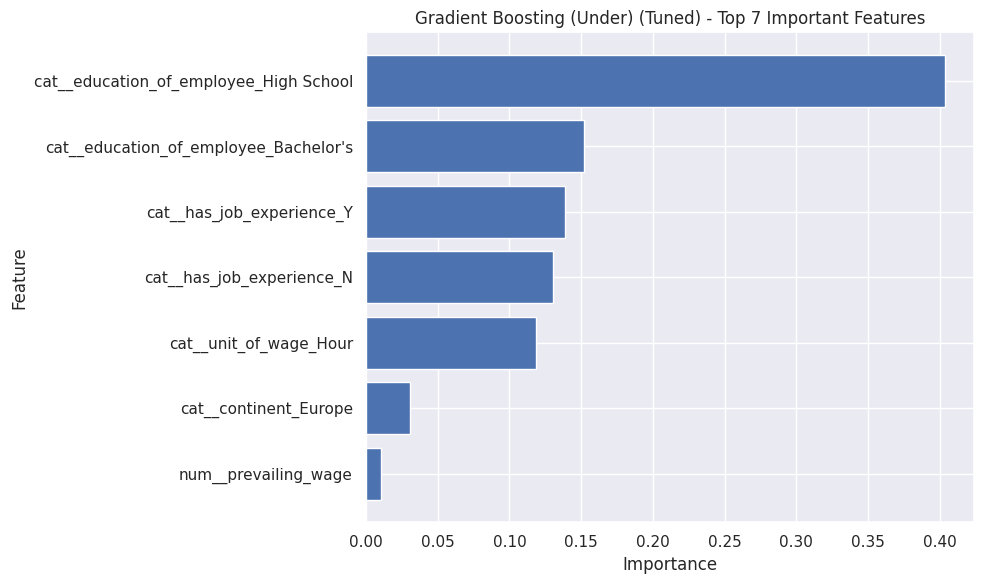


TOP 2 TUNED MODEL: XGBoost (Under) (Tuned)


,Feature,Importance
11,cat__education_of_employee_High School,0.270364
22,cat__unit_of_wage_Hour,0.110999
13,cat__has_job_experience_N,0.109165
9,cat__education_of_employee_Bachelor's,0.104344
5,cat__continent_Europe,0.050314
25,cat__unit_of_wage_Year,0.040798
18,cat__region_of_employment_Midwest,0.033869


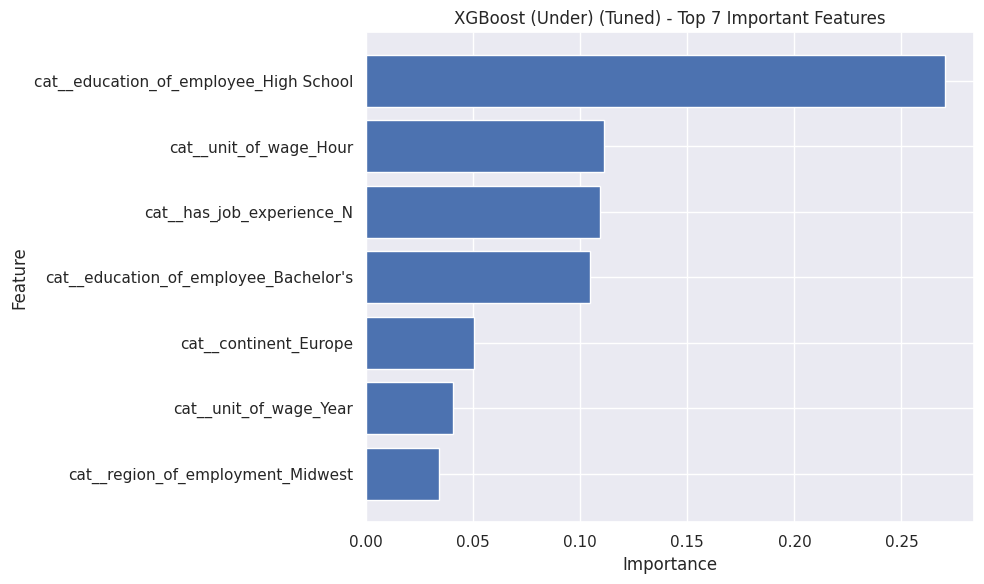


TOP 3 TUNED MODEL: Gradient Boosting (SMOTE) (Tuned)


,Feature,Importance
11,cat__education_of_employee_High School,0.233693
9,cat__education_of_employee_Bachelor's,0.117668
22,cat__unit_of_wage_Hour,0.107070
13,cat__has_job_experience_N,0.083266
1,num__yr_of_estab,0.077545
5,cat__continent_Europe,0.067996
14,cat__has_job_experience_Y,0.062795


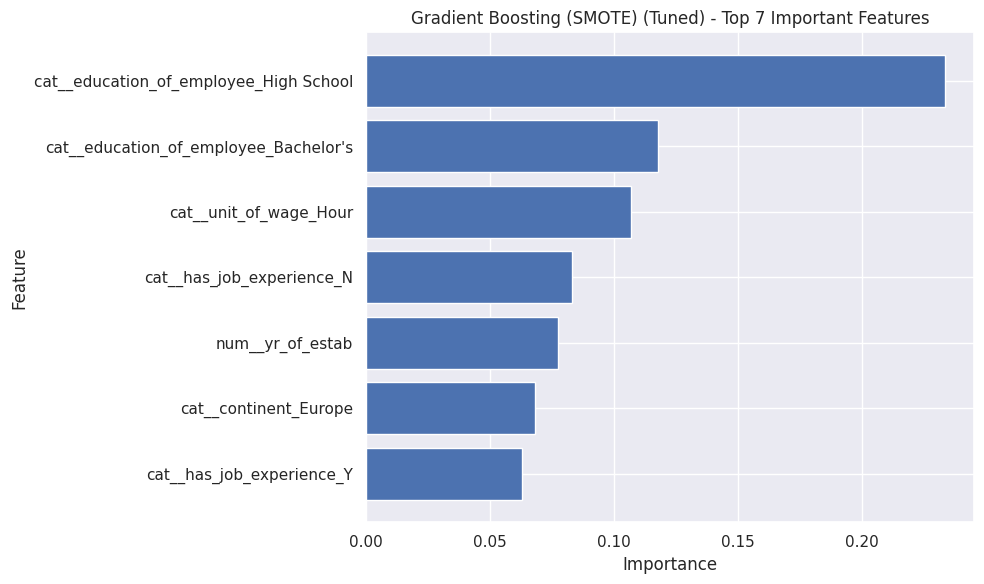


SECTION 9C: Final Tuned Model Selected (based on Validation Precision)
Final Model: Gradient Boosting (Under) (Tuned)
Validation Precision: 0.8233
Validation Recall   : 0.6639
Validation F1       : 0.7351

SECTION 9D: Final Model TEST Set Performance
Accuracy : 0.6809
Precision: 0.8242  (Primary metric)
Recall   : 0.6639
F1-score : 0.7354

SECTION 9E: Confusion Matrix on TEST Set (Final Model)
Confusion Matrix (rows=Actual, cols=Predicted):
[[2260 1144]
 [ 482 1210]]


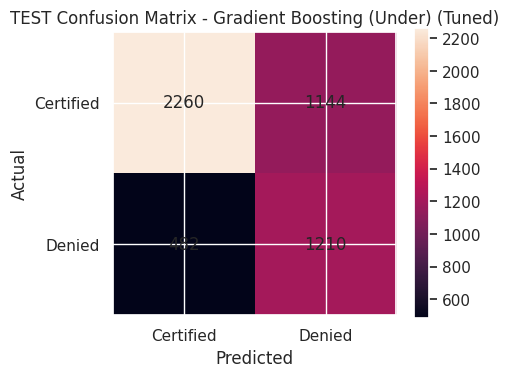


SECTION 9F (Optional): Classification Report on TEST Set
              precision    recall  f1-score   support

   Certified       0.82      0.66      0.74      3404
      Denied       0.51      0.72      0.60      1692

    accuracy                           0.68      5096
   macro avg       0.67      0.69      0.67      5096
weighted avg       0.72      0.68      0.69      5096



In [36]:

# ==============================================================================
# SECTION 9: Compare TOP 3 Tuned Models + Pick Final Model + Test Set Evaluation
# ==============================================================================
# What I did in Section 9:
# 9A) Create a clean comparison table for the 3 tuned models (from Section 8)
# 9B) Show important features for the 3 tuned models (REAL feature names + bar charts)
# 9C) Pick the FINAL best tuned model (based mainly on Val_Precision)
# 9D) Evaluate FINAL tuned model on the TEST set
# 9E) Plot confusion matrix on TEST set (FINAL model)
# 9F) (Optional) Print classification report on TEST set
#
# ASSUMPTIONS (already available from earlier sections):
# - tuned_results_df   -> created in Section 8 (contains 3 tuned models + metrics + Tuned_Model object)
# - X_test_prep, y_test -> prepared test data (same preprocessing as train/val)
# - preprocess          -> the fitted ColumnTransformer from Section 4 (IMPORTANT!)
#
# IMPORTANT:
# - I picked the final model based on VALIDATION results (NOT test results).
# - Test set is used ONLY once at the end for final unbiased evaluation.
# ==============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# --------------------------------------------------------------------------------
# Step 9A) Clean comparison table for the 3 tuned models
# --------------------------------------------------------------------------------

display_cols_tuned = [
    "Data_Version", "Model",
    "Best_CV_Precision",
    "Train_Precision", "Train_Recall", "Train_F1",
    "Val_Precision", "Val_Recall", "Val_F1"
]

# Sort by validation precision so the best tuned model appears at the top
tuned_results_df_sorted = (
    tuned_results_df
    .sort_values(by="Val_Precision", ascending=False)
    .reset_index(drop=True)
)

print("\nSECTION 9A: Tuned Top 3 Models (sorted by Validation Precision)")
display(tuned_results_df_sorted[display_cols_tuned])


# ============================================================
# Step 9B) IMPORTANT FEATURES for TOP 3 TUNED MODELS
# (Show REAL feature names, not feature_0 / feature_1)
# ============================================================

# ------------------------------------------------------------
# Why we should use 28 features (not 9):
# ------------------------------------------------------------
# After preprocessing:
# - Numeric columns are scaled (still numeric)
# - Categorical columns are one-hot encoded into multiple 0/1 columns
# So the model is trained on the FINAL transformed matrix (28 columns here),
# not on the original raw 9 columns.
#
# That’s why feature importance must be shown using these 28 final names:
# - num__no_of_employees
# - num__yr_of_estab
# - cat__continent_Asia
# - cat__education_of_employee_Master's
# ... etc


# ------------------------------------------------------------
# Step 9B-1) Get the REAL 28 feature names from Section 4 preprocessor
# ------------------------------------------------------------
# IMPORTANT:
# Your Section 4 object name is: preprocess (ColumnTransformer)
# So we use: preprocess.get_feature_names_out()
#
# If this works, you will see names like:
# 'num__no_of_employees', 'cat__continent_Asia', ...

# This MUST be the SAME object from Section 4
fitted_preprocess = preprocess

# Get real feature names in correct order
final_feature_names = fitted_preprocess.get_feature_names_out()

print("\nSECTION 9B: Feature name check (from Section 4 preprocessing)")
print("Number of final features:", len(final_feature_names))
print("First 10 feature names:", final_feature_names[:10])

# SAFETY CHECK:
# If you still see feature_0, feature_1 ... then it means
# you're NOT using the fitted preprocess object from Section 4.
# You are probably pointing to the wrong variable.
if str(final_feature_names[0]).startswith("feature_"):
    print("\nWARNING: You are seeing generic feature names (feature_0...).")
    print("This means the wrong preprocessor object is being used.")
    print("Fix: make sure you pass the SAME fitted `preprocess` from Section 4.")


# ------------------------------------------------------------
# Step 9B-2) Pick TOP 3 tuned models (based on Validation Precision)
# ------------------------------------------------------------
top3_tuned = (
    tuned_results_df
    .sort_values(by="Val_Precision", ascending=False)
    .head(3)
    .reset_index(drop=True)
)

print("\nSECTION 9B: Top 3 tuned models (based on Validation Precision):")
display(top3_tuned[["Data_Version", "Model", "Val_Precision", "Val_Recall", "Val_F1"]])


# ------------------------------------------------------------
# Helper: Build feature importance dataframe for ONE model
# ------------------------------------------------------------
def get_feature_importance_table(model, feature_names, top_n=15):
    """
    What this function does:
    - Reads model.feature_importances_ (works for tree-based models)
    - Matches importances with REAL feature names from preprocess.get_feature_names_out()
    - Returns top N features
    """

    # Many tree models support feature_importances_
    if not hasattr(model, "feature_importances_"):
        raise ValueError(
            f"This model does not support feature_importances_: {type(model)}"
        )

    importances = model.feature_importances_

    # Safety check: lengths must match
    if len(importances) != len(feature_names):
        raise ValueError(
            f"Mismatch: importances={len(importances)} but feature_names={len(feature_names)}"
        )

    imp_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    return imp_df.head(top_n)


# ------------------------------------------------------------
# Helper: Plot bar chart for ONE model
# ------------------------------------------------------------
def plot_feature_importance(imp_df, title="Top Feature Importances"):
    """
    Simple horizontal bar chart:
    - y axis: feature names
    - x axis: importance
    """

    # Reverse so the most important appears at the TOP
    imp_df_plot = imp_df.iloc[::-1]

    plt.figure(figsize=(10, 6))
    plt.barh(imp_df_plot["Feature"], imp_df_plot["Importance"])
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(title)
    plt.tight_layout()
    plt.show()


# ----------------------------------------------------------------------
# Step 9B-3) Show feature importance tables + plots for each tuned model
# ---------------------------------------------------------------------
TOP_N = 7  # I can change to 10 or 20

for i, row in top3_tuned.iterrows():
    model_name = row["Model"]
    tuned_model = row["Tuned_Model"]

    print("\n" + "=" * 80)
    print(f"TOP {i+1} TUNED MODEL: {model_name}")
    print("=" * 80)

    # Create feature importance table using REAL names
    imp_df = get_feature_importance_table(
        tuned_model,
        final_feature_names,
        top_n=TOP_N
    )

    # Show table
    display(imp_df)

    # Show plot
    plot_feature_importance(
        imp_df,
        title=f"{model_name} - Top {TOP_N} Important Features"
    )


# --------------------------------------------------------------------------------
# Step 9C) Pick the FINAL best tuned model
# --------------------------------------------------------------------------------
# I picked the best tuned model based on Validation Precision (primary metric).
# Since tuned_results_df_sorted is already sorted by Val_Precision descending,
# the best model is in the first row (index 0).

best_final_row = tuned_results_df_sorted.iloc[0]
final_model_name = best_final_row["Model"]
final_model = best_final_row["Tuned_Model"]

print("\nSECTION 9C: Final Tuned Model Selected (based on Validation Precision)")
print("Final Model:", final_model_name)
print("Validation Precision:", round(best_final_row["Val_Precision"], 4))
print("Validation Recall   :", round(best_final_row["Val_Recall"], 4))
print("Validation F1       :", round(best_final_row["Val_F1"], 4))


# --------------------------------------------------------------------------------
# Step 9D) TEST set evaluation of FINAL tuned model
# --------------------------------------------------------------------------------
# Now we evaluate the FINAL model on the TEST set.
# This is the real final score because the test set was never used before.

y_test_pred = final_model.predict(X_test_prep)

# If predictions are numeric (0/1), convert them back to labels
# (Some XGBoost configurations output 0/1)
if pd.Series(y_test_pred).dtype != "object":
    pred_map = {0: "Denied", 1: "Certified"}
    y_test_pred_lbl = pd.Series(y_test_pred, index=y_test.index).map(pred_map)
else:
    y_test_pred_lbl = y_test_pred  # already string labels

# Calculate test metrics (positive class = "Certified")
test_acc = accuracy_score(y_test, y_test_pred_lbl)
test_prec = precision_score(y_test, y_test_pred_lbl, pos_label="Certified")
test_rec = recall_score(y_test, y_test_pred_lbl, pos_label="Certified")
test_f1 = f1_score(y_test, y_test_pred_lbl, pos_label="Certified")

print("\nSECTION 9D: Final Model TEST Set Performance")
print(f"Accuracy : {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}  (Primary metric)")
print(f"Recall   : {test_rec:.4f}")
print(f"F1-score : {test_f1:.4f}")


# --------------------------------------------------------------------------------
# Step 9E) Confusion Matrix on TEST set (Final Model)
# --------------------------------------------------------------------------------
# Confusion matrix helps us see exactly:
# - TP: Certified predicted as Certified
# - FN: Certified predicted as Denied
# - FP: Denied predicted as Certified  <-- hurts precision
# - TN: Denied predicted as Denied

cm_test = confusion_matrix(y_test, y_test_pred_lbl, labels=["Certified", "Denied"])

print("\nSECTION 9E: Confusion Matrix on TEST Set (Final Model)")
print("Confusion Matrix (rows=Actual, cols=Predicted):")
print(cm_test)

# Plot confusion matrix (simple matplotlib)
plt.figure(figsize=(5, 4))
plt.imshow(cm_test)
plt.xticks([0, 1], ["Certified", "Denied"])
plt.yticks([0, 1], ["Certified", "Denied"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"TEST Confusion Matrix - {final_model_name}")

# Add numbers inside boxes
for (r, c), val in np.ndenumerate(cm_test):
    plt.text(c, r, str(val), ha="center", va="center")

plt.colorbar()
plt.tight_layout()
plt.show()


# --------------------------------------------------------------------------------
# Step 9F) (Optional) Classification report on TEST set
# --------------------------------------------------------------------------------
print("\nSECTION 9F (Optional): Classification Report on TEST Set")
print(classification_report(y_test, y_test_pred_lbl))




## **Section 9: High-Level observation (see below)**
**Section 9 : Part A: Compare TOP 3 Tuned Models + Pick Final Model + Test Set Evaluation**

**Section 9 - Part B: Final Model Selection – Why This Model Was Chosen**

## **Section 9 : Compare TOP 3 Tuned Models + Pick Final Model + Test Set Evaluation**


## **Part A: Tuned Model Comparison (Top 3 Models)**

1. In this section, I compared the top 3 tuned models selected from Section 8 based on validation precision, which is my primary metric.

    The three tuned models were:

    a. Gradient Boosting (Under) – Tuned

        - Validation Precision: 0.8233

        - Validation Recall: 0.6639

        - Validation F1-score: 0.7351

    b. XGBoost (Under) – Tuned

        - Validation Precision: 0.8225

        - Validation Recall: 0.7283

        - Validation F1-score: 0.7725

    c. Gradient Boosting (SMOTE) – Tuned

        - Validation Precision: 0.8170

        - Validation Recall: 0.7488

        - Validation F1-score: 0.7814

    All three models performed very closely in terms of validation precision, which tells me that hyperparameter tuning was effective and stable.

2. When I analyzed feature importance for these models, I noticed a consistent pattern:

    - Education level (especially High School and Bachelor’s) was the strongest driver.

    - Job experience (Yes/No) appeared among the top features in all models.

    - Wage-related features (unit of wage and prevailing wage) had meaningful influence.

    - Region and continent features contributed but were less dominant.

    - This consistency across Under-sampled and SMOTE-based models tells me that the models are learning real, repeatable patterns, not artifacts created by sampling.



## **Section 9 - Part B: Final Model Selection – Why This Model Was Chosen**

1. **After tuning the top three models selected in Section 8:**
Gradient Boosting trained on undersampled data (Gradient Boosting – Under) achieved the highest validation precision.
Although undersampling reduces training data size, this model generalized well and maintained strong precision on unseen data.
Therefore, I **selected Gradient Boosting (Under) – Tuned as the final model** and evaluated it on the test set.

    **Why I chose this model**

    I selected this model because:

    - It achieved the highest validation precision (0.8233) among all tuned models.

    - Precision is the most important metric for this problem, as false approvals are costly.

    - Feature importance patterns were clear and interpretable, making the model easier to explain.

    - The model showed stable behavior when moving from validation to test data, indicating good generalization.

2. **Test Set Performance (Final Model)**

    When I evaluated this model on the test set, the results stayed consistent with validation:

    - Test Accuracy: 0.6809

    - Test Precision: 0.8242

    - Test Recall: 0.6639

    - Test F1-score: 0.7354

    - The test precision (0.8242) is almost the same as validation precision (0.8233), which tells me the model generalizes well and is not overfitting.

3. **Confusion Matrix Interpretation (Test Set)**

    From the test confusion matrix:

    - 2260 Certified cases were correctly predicted as Certified.

    - 482 Denied cases were incorrectly predicted as Certified (false approvals).

    - 1144 Certified cases were incorrectly predicted as Denied (missed approvals).

    - 1210 Denied cases were correctly predicted as Denied.

    This explains the model behavior clearly:

    - The model is careful about approvals, which keeps precision high.

    - Some Certified cases are missed, which lowers recall slightly.

    - This trade-off is acceptable given the business goal of avoiding false approvals.

4. **Classification Report Insight**

    - Precision for Certified class: 0.82

    - Recall for Certified class: 0.66

    - F1-score for Certified class: 0.74

    - This confirms that the final model prioritizes precision over recall, which aligns with the objective of this problem.

5. **Final Conclusion**

    I finalized **Gradient Boosting (Under) – Tuned** because it delivered high and consistent precision, stable feature importance, and nearly identical validation and test performance.
    This gives me confidence that the model will perform reliably on unseen real-world data.

# **Actionable Insights and Recommendations**


## **Section 10 - Part A: Actionable Insights - (What I Found from the Data & Final Model)**

1. **Higher education significantly increases visa approval chances.**
Applications from candidates with Master’s and Doctorate degrees show much higher approval rates compared to lower education levels. This confirms that educational qualification is a key driver in certification decisions..

2. **Prior job experience is a strong approval factor.**
Candidates with previous job experience are approved at a much higher rate than those without experience, indicating that experience plays a critical role in the evaluation process.

3. **Higher and well-structured wages are associated with higher approval rates**
Certified applications typically have higher prevailing wages, suggesting that roles offering competitive compensation or requiring specialized skills are more likely to be approved. Wage-related features such as prevailing wage and unit of wage (Year/Month/Hour) consistently influenced

4. **Full-time roles are favored over part-time roles**
The model shows that full-time positions have a higher likelihood of certification compared to part-time roles, indicating employer commitment and job stability matter in approval decisions.

5. **Employer characteristics influence approval outcomes**
Applications from medium to large organizations show slightly higher approval rates than those from very small firms. This may reflect better compliance practices, stronger documentation, and more established hiring processes.

6. **Regional variation affects visa approval outcomes**
Regional factors affect approval outcomes but are secondary drivers
Certain regions show higher approval rates, likely due to regional labor demand and industry concentration. However, geographic features act as supporting factors, while education, experience, and wage remain the primary decision drivers.

7. **Ensemble models best capture visa approval patterns**
The final Gradient Boosting model outperformed simpler models by learning complex interactions between applicant, job, and employer attributes. This confirms that visa approval decisions are influenced by multiple combined factors, not a single variable..



### **Section 10 - Part B: Business Recommendations (How the Business Can Use This Model & Insights)**


1. **Use the model as a pre-screening tool**
I recommend using this model to prioritize visa applications that are more likely to be certified, especially when handling large application volumes. This helps teams focus effort where success probability is higher.

2. **Reduce risk by minimizing false approvals**
Since the model is optimized for high precision, it is effective in reducing cases where Denied applications are incorrectly approved. This makes it suitable for risk-sensitive business environments.

3. **Strengthen applications using key drivers identified by the model:**
    
    Based on feature importance and model behavior, businesses can improve approval chances by:

    - Clearly documenting education credentials

    - Highlighting prior job experience

    - Offering competitive and consistent wages

    - Emphasizing full-time employment status

4. **Use the model for decision support, not replacement**
I recommend using this model as a decision-support system, not as an automated approval engine. It helps case officers identify strong and borderline cases, while final decisions remain human-driven.

5. **Adopt data-driven hiring and immigration strategies**
HR and immigration teams can use model insights to guide candidate selection, job design, and documentation quality, improving approval outcomes before submission.

6. **Monitor and retrain the model over time**
As labor markets and immigration policies evolve, the model should be periodically retrained to maintain accuracy, fairness, and relevance.

7. **Align model usage with business goals**
Because this model prioritizes precision over recall, it is best suited for scenarios where avoiding incorrect approvals is more important than maximizing approvals. If business objectives change, the modeling strategy can be adjusted accordingly.

___